In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/aramco.csv')

In [4]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1095 non-null   object 
 1   Open               1095 non-null   float64
 2   High               1095 non-null   float64
 3   Low                1095 non-null   float64
 4   Close              1095 non-null   float64
 5   Volume             1095 non-null   int64  
 6   Dividends          1095 non-null   float64
 7   Stock Splits       1095 non-null   float64
 8   Close_diff         1094 non-null   float64
 9   Lag_Close          1094 non-null   float64
 10  Lag_High           1094 non-null   float64
 11  Lag_Low            1094 non-null   float64
 12  Rolling_Mean_7     1089 non-null   float64
 13  Rolling_Std_7      1089 non-null   float64
 14  Rolling_Mean_30    1066 non-null   float64
 15  Rolling_Std_30     1066 non-null   float64
 16  RSI                1082 

In [5]:
# Check for missing values and filter for columns with missing data
missing_values = df.isnull().sum().loc[lambda x: x > 0]

# Display the columns with missing values and the count of missing values
missing_values

,0
Close_diff,1
Lag_Close,1
Lag_High,1
Lag_Low,1
Rolling_Mean_7,6
Rolling_Std_7,6
Rolling_Mean_30,29
Rolling_Std_30,29
RSI,13
BB_Middle_Band,19


In [6]:
# Define the columns with larger gaps
large_missing_columns = ['Rolling_Mean_7', 'Rolling_Std_7', 'Rolling_Mean_30', 'Rolling_Std_30', 'RSI', 'BB_Middle_Band', 'BB_Upper_Band', 'BB_Lower_Band']

# Apply interpolation using a time-based or polynomial method for smoother filling (if data supports it)
df[large_missing_columns] = df[large_missing_columns].interpolate(method='linear', limit_direction='both')

# Reapply forward and backward filling to handle any remaining gaps
df[large_missing_columns] = df[large_missing_columns].fillna(method='ffill').fillna(method='bfill')

# Final check for missing values in these columns
remaining_missing_values = df[large_missing_columns].isnull().sum()

# Display any remaining missing values
print(remaining_missing_values[remaining_missing_values > 0])


Series([], dtype: int64)


<ipython-input-6-c32b80ad34db>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[large_missing_columns] = df[large_missing_columns].fillna(method='ffill').fillna(method='bfill')


In [7]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Normalize and Scale Financial Metrics using StandardScaler
financial_columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Apply Standard Scaling (mean = 0, std = 1)
scaler = StandardScaler()
df[financial_columns] = scaler.fit_transform(df[financial_columns])

# Step 2: Convert Date and Time Fields using a more flexible approach
# Convert the Date column to a proper datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create new temporal features in a more compact manner
df[['Day_of_Week', 'Month', 'Quarter', 'Year']] = df['Date'].apply(
    lambda x: pd.Series([x.dayofweek, x.month, x.quarter, x.year])
)

# Step 3: Data Augmentation with Lag Features
# Implement lag features for both 'Close' and 'Volume'
lags = [1, 7, 30]
for lag in lags:
    df[f'Lag_Close_{lag}'] = df['Close'].shift(lag)
    df[f'Lag_Volume_{lag}'] = df['Volume'].shift(lag)

# Step 4: Handling Missing Values After Lag Creation
# Instead of dropping all rows, we apply a combination of forward and backward filling
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

# Final dataset with newly created features
df.head()

<ipython-input-7-08422cd2ac45>:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-7-08422cd2ac45>:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_diff,Lag_Close,...,Year,Quarter,Volume_Normalized,Day_of_Week,Lag_Close_1,Lag_Volume_1,Lag_Close_7,Lag_Volume_7,Lag_Close_30,Lag_Volume_30
0,2019-12-11 00:00:00+03:00,-0.971620,-1.013248,-0.933814,-0.977341,1.580604,0.0,0.0,1.158422,25.485229,...,2019,4,1.580604,2,-0.977341,1.580604,-0.977341,1.580604,-0.977341,1.580604
1,2019-12-12 00:00:00+03:00,-0.241565,-0.289632,-0.764457,-0.642221,27.146985,0.0,0.0,1.158422,25.485229,...,2019,4,27.146985,3,-0.977341,1.580604,-0.977341,1.580604,-0.977341,1.580604
2,2019-12-15 00:00:00+03:00,-0.575303,-0.537728,-0.595099,-0.516552,4.865806,0.0,0.0,0.434408,26.643652,...,2019,4,4.865806,6,-0.642221,27.146985,-0.977341,1.580604,-0.977341,1.580604
3,2019-12-16 00:00:00+03:00,-0.491868,-0.413679,-0.446911,-0.390881,5.282864,0.0,0.0,0.434410,27.078060,...,2019,4,5.282864,0,-0.516552,4.865806,-0.977341,1.580604,-0.977341,1.580604
4,2019-12-17 00:00:00+03:00,-0.377147,-0.403343,-0.446913,-0.443245,7.290218,0.0,0.0,-0.181007,27.512470,...,2019,4,7.290218,1,-0.390881,5.282864,-0.977341,1.580604,-0.977341,1.580604


In [8]:
# Step 1: Select numeric columns (both integers and floats) using select_dtypes
numeric_columns = df.select_dtypes(include=['number']).columns

# Step 2: Calculate skewness and kurtosis for numeric columns
skewness = df[numeric_columns].skew()
kurtosis = df[numeric_columns].kurt()

# Step 3: Get descriptive statistics and combine with skewness and kurtosis
descriptive_stats = df[numeric_columns].describe()

# Create a DataFrame for skewness and kurtosis to combine later
additional_stats = pd.DataFrame({'skewness': skewness, 'kurtosis': kurtosis})

# Concatenate descriptive statistics with skewness and kurtosis
descriptive_stats = pd.concat([descriptive_stats, additional_stats.T])

# Step 4: Display the updated descriptive statistics
descriptive_stats

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_diff,Lag_Close,Lag_High,...,Year,Quarter,Volume_Normalized,Day_of_Week,Lag_Close_1,Lag_Volume_1,Lag_Close_7,Lag_Volume_7,Lag_Close_30,Lag_Volume_30
count,1.095000e+03,1.095000e+03,1.095000e+03,1.095000e+03,1.095000e+03,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,...,1095.000000,1095.000000,1.095000e+03,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,-9.344124e-16,-1.557354e-15,-2.076472e-16,1.038236e-16,5.515629e-17,0.003695,0.004018,0.005135,28.859569,29.029327,...,2021.649315,2.433790,6.813423e-17,2.391781,-0.001180,0.001436,-0.008481,0.010367,-0.039891,0.040189
std,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,1.000457e+00,0.031589,0.066393,0.321407,3.459673,3.505008,...,1.293825,1.156395,1.000457e+00,2.059651,1.000847,1.001597,1.003081,1.008212,1.009301,1.031992
min,-2.682030e+00,-2.439804e+00,-2.669721e+00,-2.527264e+00,-5.137786e-01,0.000000,0.000000,-2.172035,20.127542,20.489549,...,2019.000000,1.000000,-5.137786e-01,0.000000,-2.527264,-0.513779,-2.527264,-0.513779,-2.527264,-0.513779
25%,-6.659480e-01,-6.779867e-01,-6.557485e-01,-6.698438e-01,-3.071663e-01,0.000000,0.000000,-0.113423,26.546534,26.657453,...,2021.000000,1.000000,-3.071663e-01,1.000000,-0.670317,-0.307166,-0.680169,-0.307119,-0.729201,-0.307119
50%,-1.227028e-01,-1.341720e-01,-1.364877e-01,-1.122017e-01,-1.745248e-01,0.000000,0.000000,0.000000,28.475794,28.544203,...,2022.000000,2.000000,-1.745248e-01,2.000000,-0.112202,-0.174525,-0.163052,-0.174123,-0.238708,-0.172220
75%,8.598463e-01,8.583683e-01,8.817155e-01,8.616965e-01,9.263246e-02,0.000000,0.000000,0.115743,31.842310,32.039476,...,2023.000000,4.000000,9.263246e-02,3.000000,0.861696,0.093697,0.861696,0.103565,0.861696,0.119526
max,2.176109e+00,2.314669e+00,2.185683e+00,2.183401e+00,2.714699e+01,0.302400,1.100000,2.027229,36.411102,37.139321,...,2024.000000,4.000000,2.714699e+01,6.000000,2.183401,27.146985,2.183401,27.146985,2.183401,27.146985
skewness,-8.588472e-04,3.996792e-02,-4.278499e-02,2.465646e-03,1.931670e+01,8.743288,16.477174,0.294686,0.005124,0.042555,...,0.091282,0.081591,1.931670e+01,0.698283,0.005124,19.250132,0.021658,18.868282,0.092592,17.579791
kurtosis,-8.687455e-01,-9.358597e-01,-8.338410e-01,-8.893849e-01,5.008012e+02,75.936226,269.990398,7.501000,-0.891847,-0.938230,...,-1.047848,-1.439893,5.008012e+02,-0.707914,-0.891847,498.407093,-0.905463,484.737609,-0.935351,439.379036


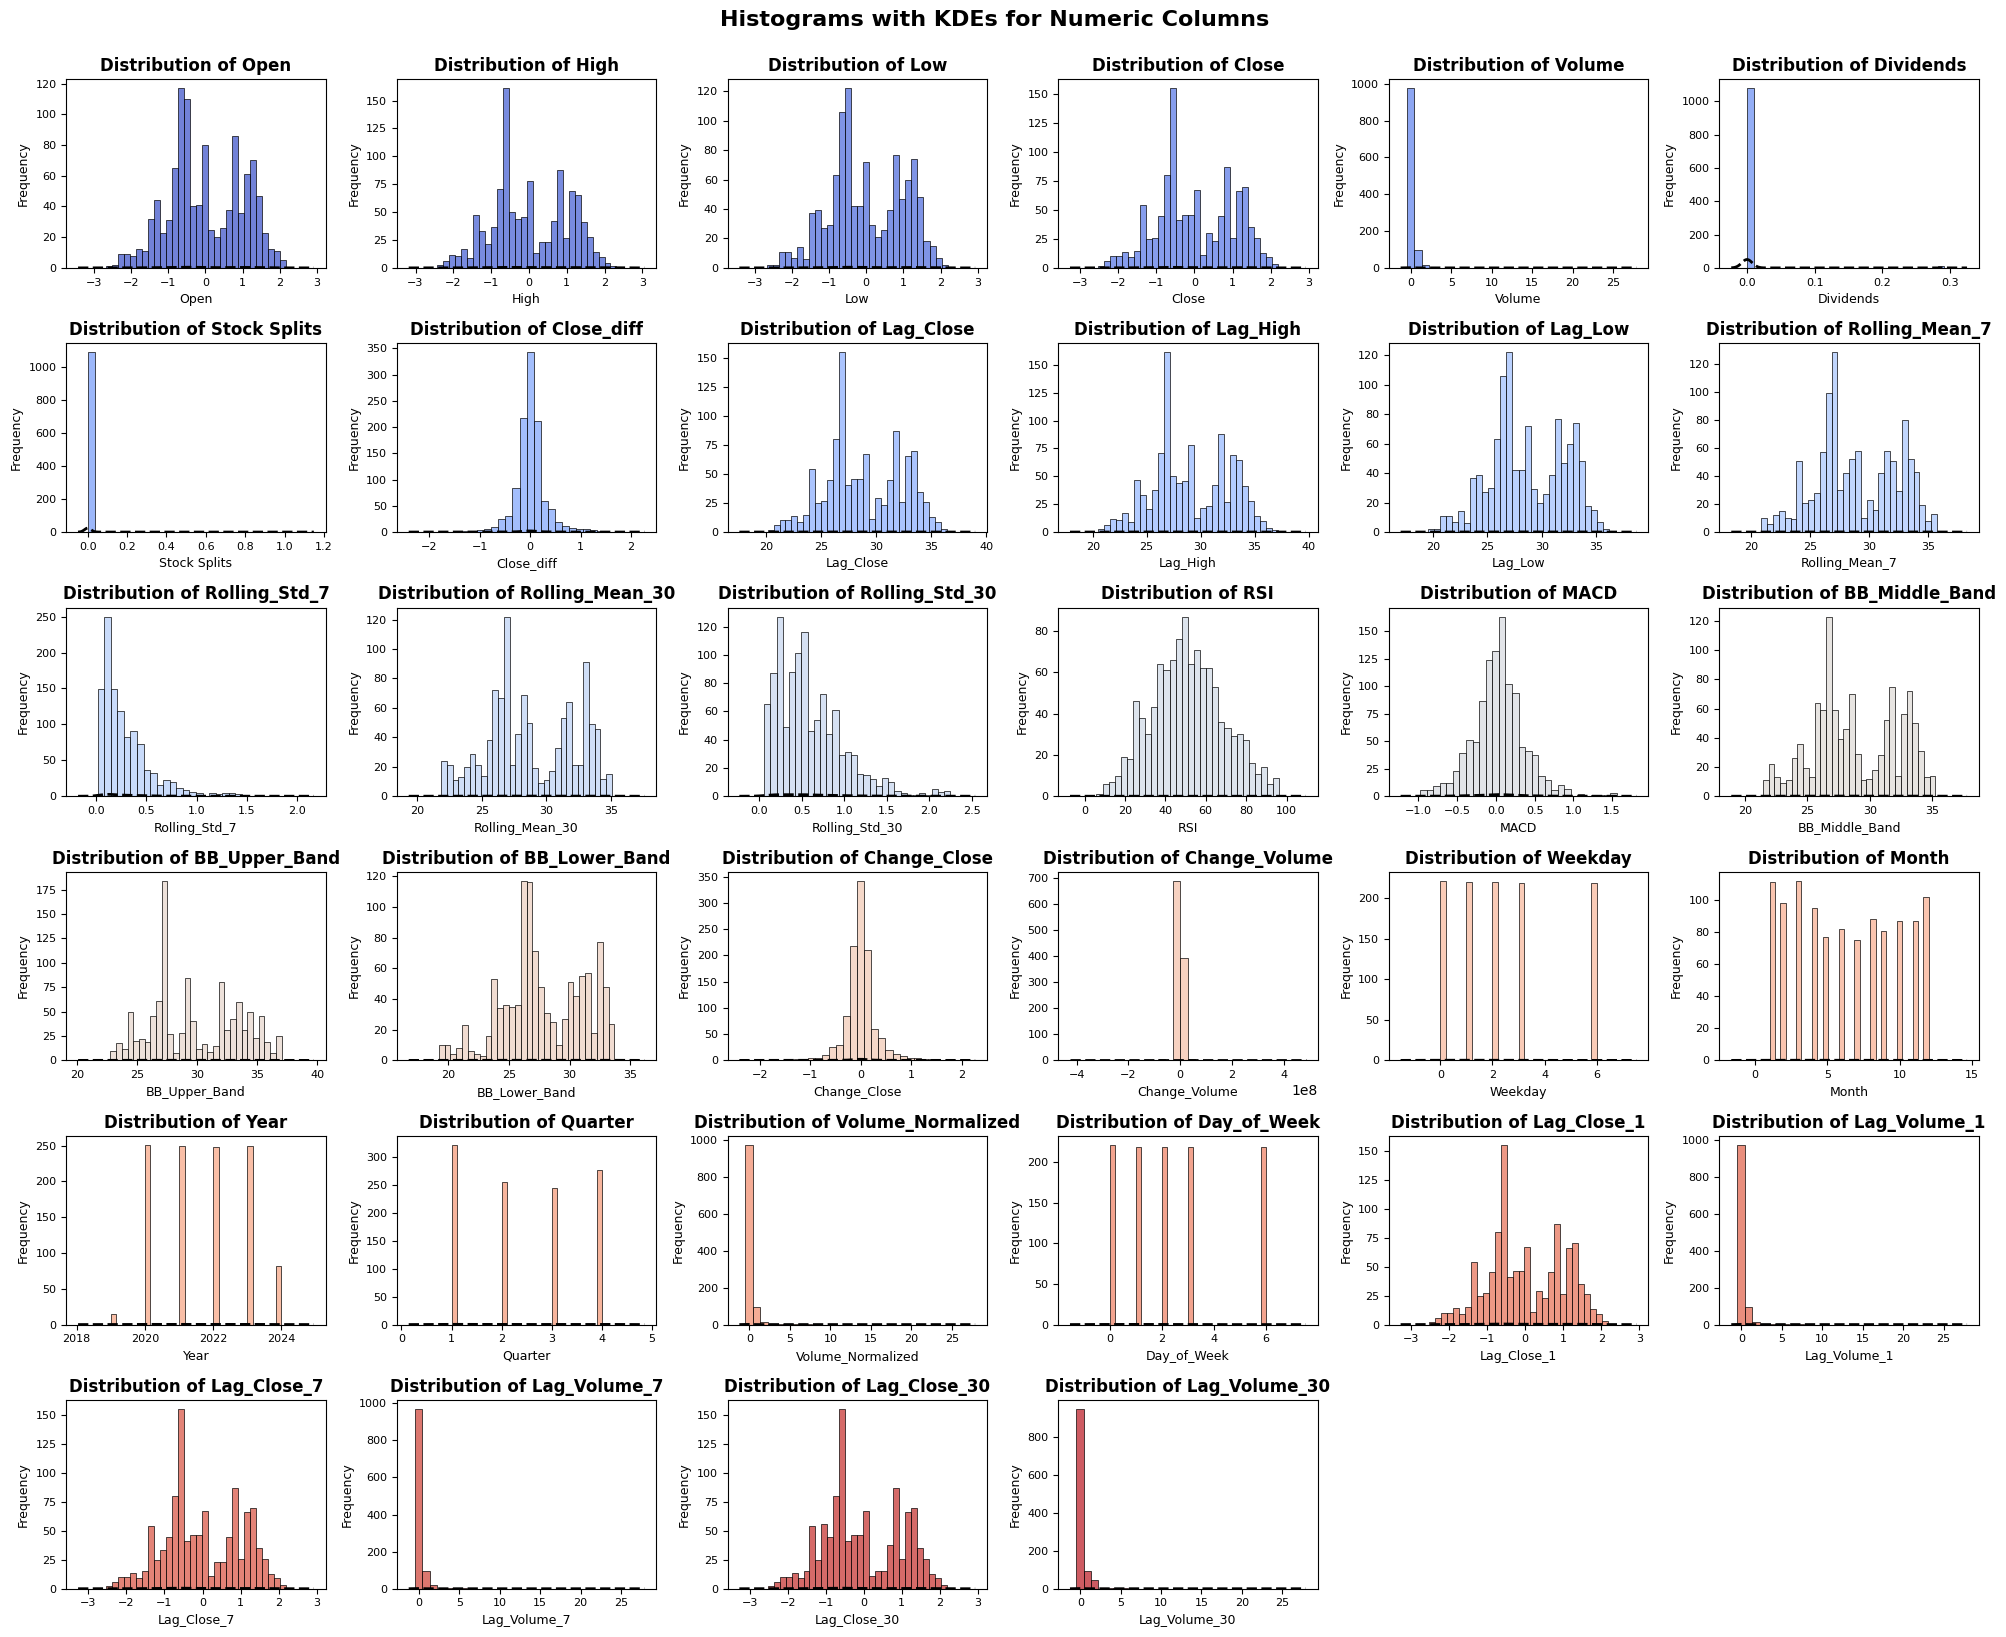

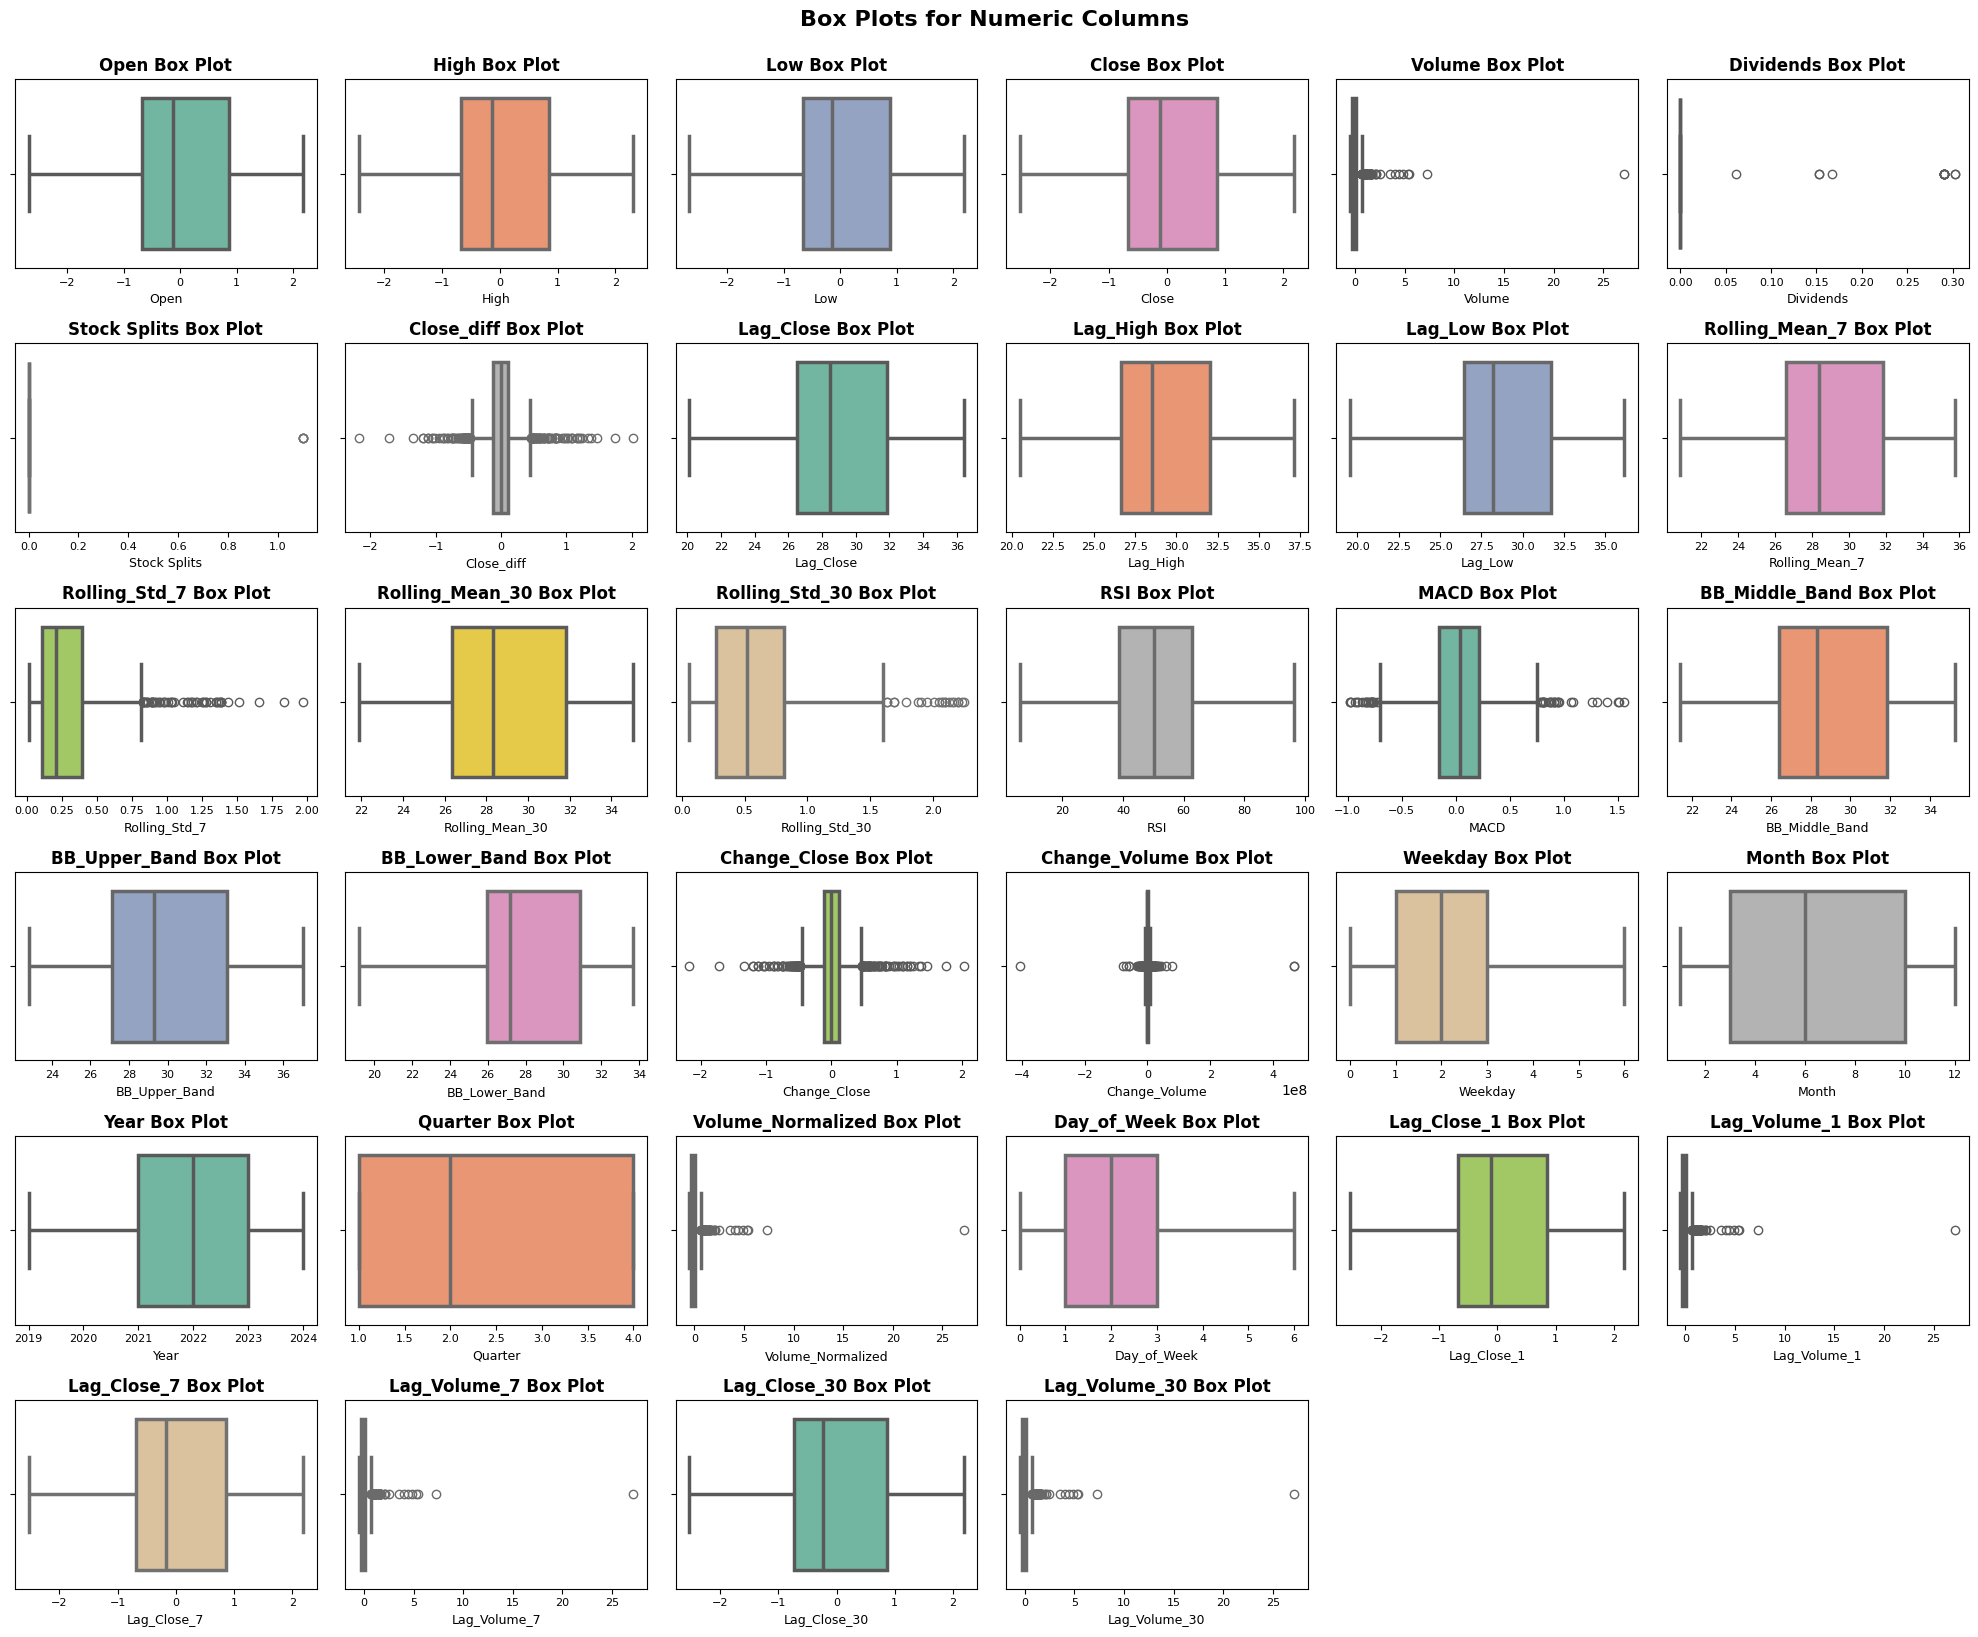

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Extract all relevant numeric columns
relevant_columns = df.select_dtypes(include=['number']).columns

# Define the number of columns and rows for the subplots grid
num_columns = len(relevant_columns)
grid_size = math.ceil(math.sqrt(num_columns))  # Creates a square-like grid

# Set up the color palettes for histograms and box plots
hist_colors = sns.color_palette("coolwarm", num_columns)  # Gradient color palette for histograms
box_colors = sns.color_palette("Set2", num_columns)  # Different palette for boxplots

# Set up the plot grid for histograms
plt.figure(figsize=(20, 16))  # Adjusted figure size for better visualization

for i, column in enumerate(relevant_columns):
    plt.subplot(grid_size, grid_size, i + 1)
    # Plot histogram and add separate KDE with desired styling
    sns.histplot(df[column], bins=30, color=hist_colors[i])
    sns.kdeplot(df[column], color="black", linestyle="--", linewidth=2)  # Separate KDE plot
    plt.title(f'Distribution of {column}', fontsize=12, fontweight='bold')
    plt.xlabel(column, fontsize=9)
    plt.ylabel('Frequency', fontsize=9)
    plt.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.suptitle('Histograms with KDEs for Numeric Columns', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Set up the plot grid for box plots
plt.figure(figsize=(20, 16))  # Adjusted figure size for box plots

for i, column in enumerate(relevant_columns):
    plt.subplot(grid_size, grid_size, i + 1)
    # Add custom color for each box plot and adjust width for better appearance
    sns.boxplot(x=df[column], color=box_colors[i], linewidth=2.5)
    plt.title(f'{column} Box Plot', fontsize=12, fontweight='bold')
    plt.xlabel(column, fontsize=9)
    plt.tick_params(axis='x', which='major', labelsize=8)

plt.tight_layout()
plt.suptitle('Box Plots for Numeric Columns', fontsize=16, fontweight='bold', y=1.02)
plt.show()


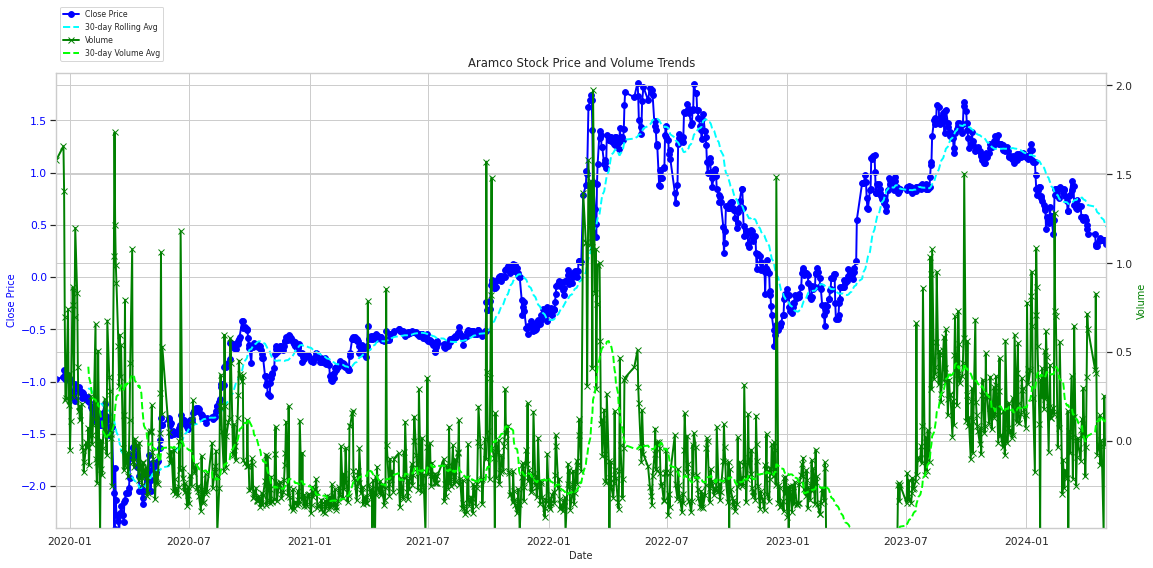

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the figure size and style
sns.set(style="whitegrid")

# Convert 'Date' to datetime if not already in the correct format
df['Date'] = pd.to_datetime(df['Date'])

# Ensure no extreme values in the 'Close' and 'Volume' columns
df = df[df['Close'] < df['Close'].quantile(0.99)]  # Exclude extremely high values
df = df[df['Volume'] < df['Volume'].quantile(0.99)]  # Exclude extremely high values

# 1. Combined line plot for stock price and volume trends with dual y-axes
fig, ax1 = plt.subplots(figsize=(20, 10), dpi=70)  # Further reduced figure size and DPI

# Line plot for Close Price (Primary Y-axis)
ax1.plot(df['Date'], df['Close'], label='Close Price', color='blue', linewidth=2, linestyle='-', marker='o')
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Close Price', color='blue', fontsize=10)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Aramco Stock Price and Volume Trends', fontsize=12)

# Manually set the axis limits for better scaling
ax1.set_xlim([df['Date'].min(), df['Date'].max()])  # Adjust based on actual date range
ax1.set_ylim([df['Close'].min() * 0.95, df['Close'].max() * 1.05])  # Ensure some margin around data

# Adding a rolling average for smoothing stock prices
df['Rolling_Close'] = df['Close'].rolling(window=30).mean()
ax1.plot(df['Date'], df['Rolling_Close'], label='30-day Rolling Avg', color='cyan', linestyle='--', linewidth=2)

# 2. Line plot for Volume (Secondary Y-axis)
ax2 = ax1.twinx()  # Secondary axis shares the same x-axis
ax2.plot(df['Date'], df['Volume'], label='Volume', color='green', linewidth=2, linestyle='-', marker='x')
ax2.set_ylabel('Volume', color='green', fontsize=10)

# Manually set limits for the volume to avoid scaling issues
ax2.set_ylim([df['Volume'].min() * 0.95, df['Volume'].max() * 1.05])

# Adding a rolling average for smoothing trading volumes
df['Rolling_Volume'] = df['Volume'].rolling(window=30).mean()
ax2.plot(df['Date'], df['Rolling_Volume'], label='30-day Volume Avg', color='lime', linestyle='--', linewidth=2)

# Adding legends for both axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.95), fontsize=8)

# Adjust layout manually
plt.subplots_adjust(left=0.1, right=0.85, top=0.85, bottom=0.2)

plt.show()


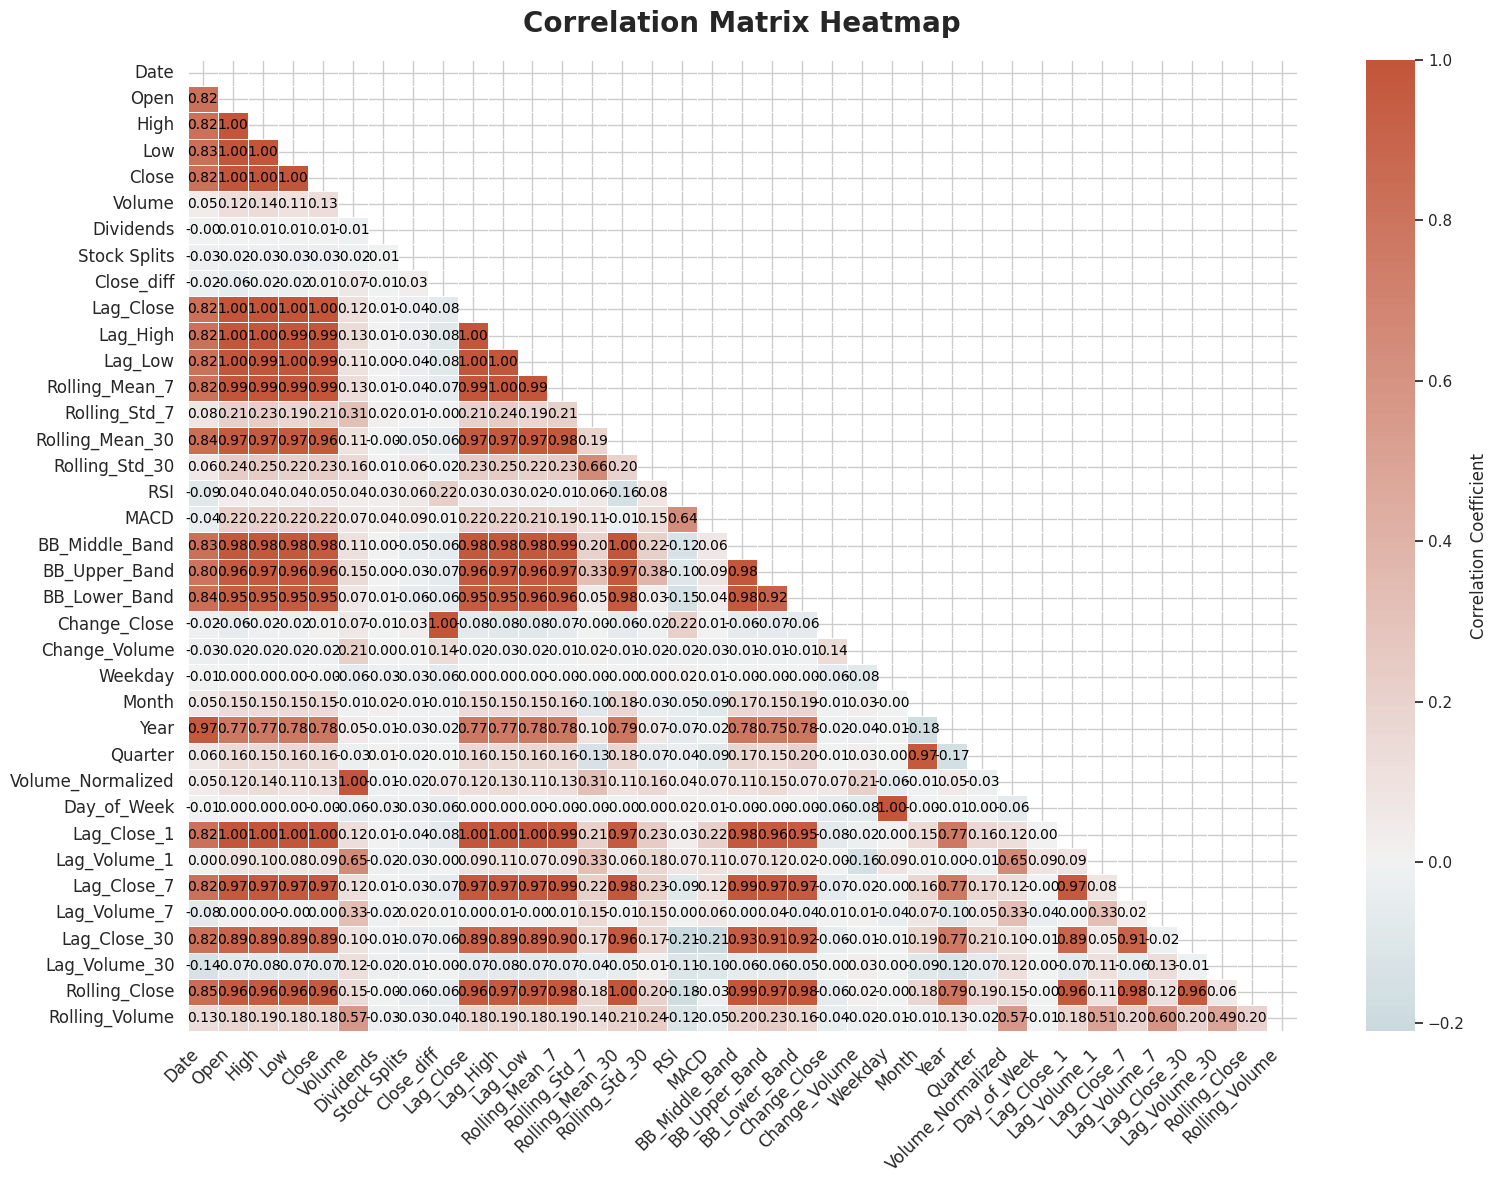

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the correlation matrix
correlation_matrix = df.corr()

# Mask the upper triangle (since it's symmetrical)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the plot
plt.figure(figsize=(16, 12))

# Create a custom diverging color palette that is symmetrical around 0
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap=cmap,
            center=0, linewidths=0.5, cbar_kws={'label': 'Correlation Coefficient'},
            annot_kws={"size": 10, "color": "black"})  # Adjust text size and color

# Add titles and labels
plt.title('Correlation Matrix Heatmap', fontsize=20, fontweight='bold', pad=20)
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12, rotation=0)

plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 12, not 13

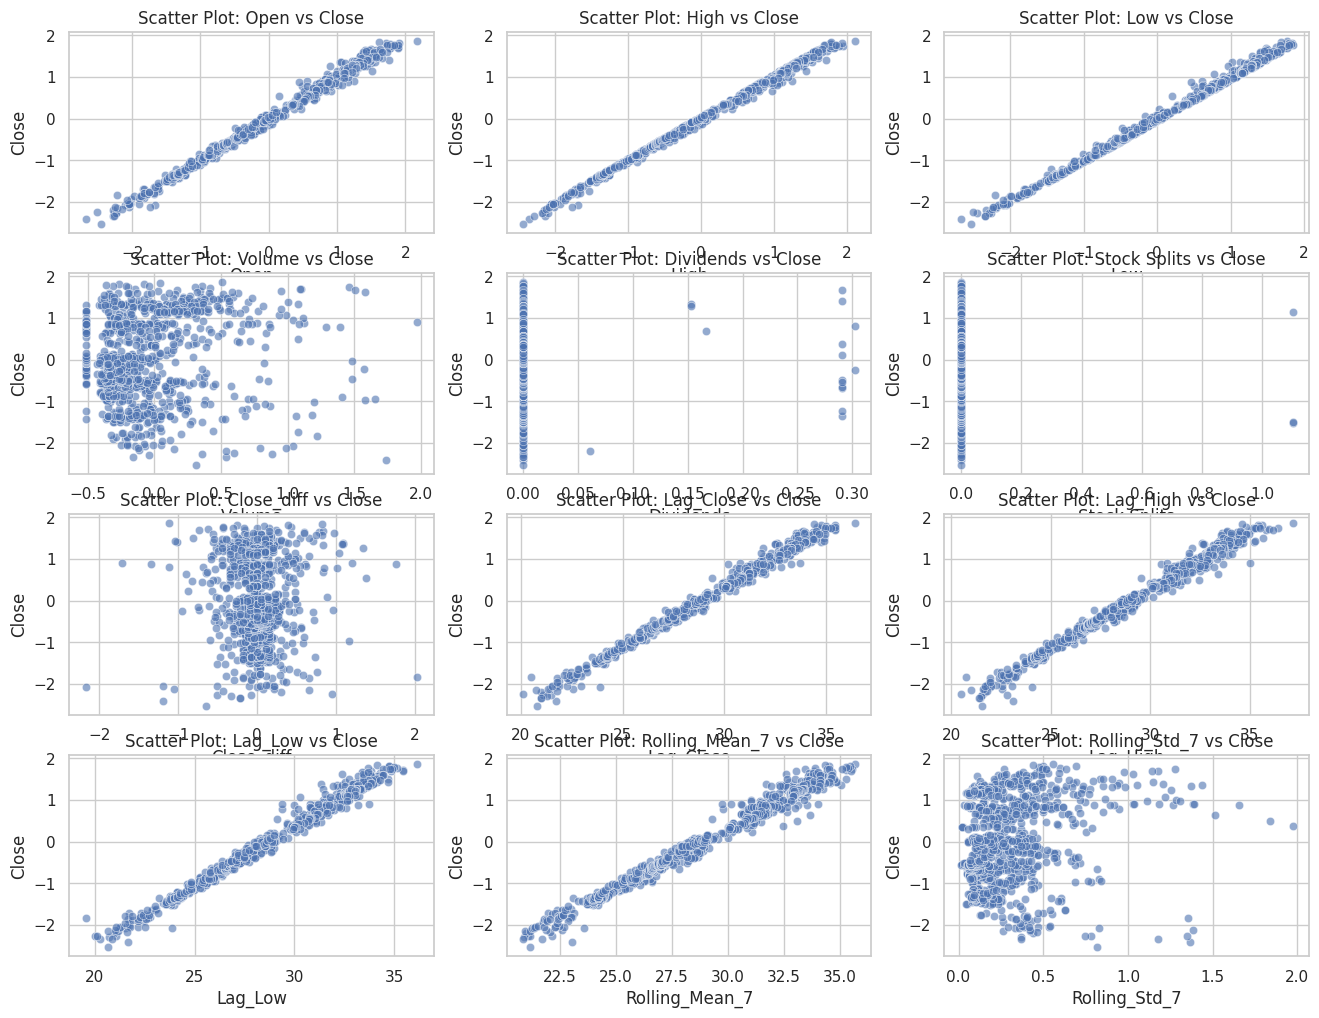

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select only the numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Remove the 'Close' column from numeric columns for comparison
numeric_columns = numeric_columns.drop('Close')

# Set up the plot grid (one scatter plot per numeric column)
plt.figure(figsize=(16, 12))

# Create scatter plots for each numeric column vs 'Close'
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 3, i + 1)  # Adjust grid size depending on the number of columns
    sns.scatterplot(x=df[column], y=df['Close'], alpha=0.6)
    plt.title(f'Scatter Plot: {column} vs Close')
    plt.xlabel(column)
    plt.ylabel('Close')

plt.tight_layout()
plt.suptitle('Scatter Plots of Numeric Columns vs Close', fontsize=16, fontweight='bold', y=1.02)
plt.show()

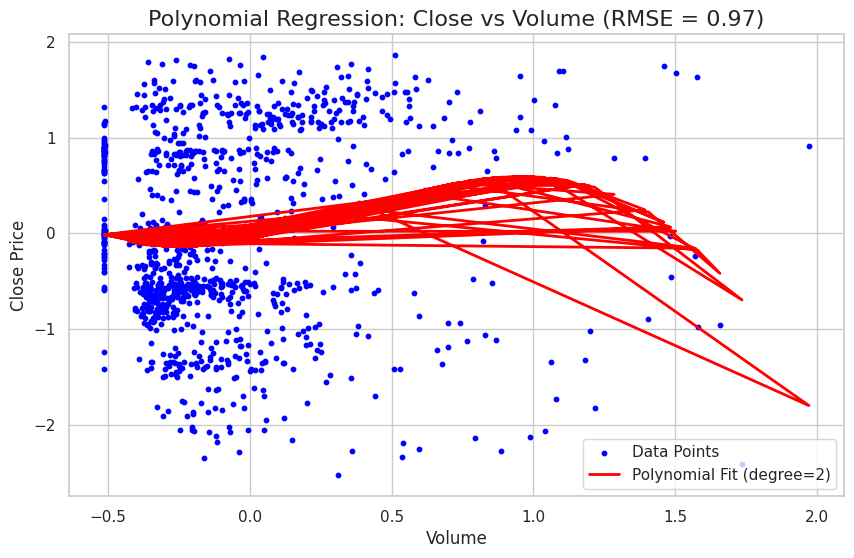

Partial Correlation between Close and Volume controlling for Lag_Close_1: 0.06


In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Polynomial Regression Analysis: Exploring non-linear relationships

# Step 1: Selecting 'Close' vs 'Volume' for polynomial regression
X = df['Volume'].values.reshape(-1, 1)  # Volume is the independent variable
y = df['Close'].values  # Close price is the dependent variable

# Step 2: Transforming the 'Volume' feature to include polynomial terms (degree=2)
poly = PolynomialFeatures(degree=3)  # You can change 'degree' to test higher orders
X_poly = poly.fit_transform(X)

# Step 3: Fitting the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Step 4: Predicting the 'Close' values using the polynomial model
y_poly_pred = model.predict(X_poly)

# Step 5: Calculating the error (Root Mean Squared Error)
mse = mean_squared_error(y, y_poly_pred)
rmse = np.sqrt(mse)

# Step 6: Plotting the polynomial fit results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', s=10, label='Data Points')  # Scatter plot for original data
plt.plot(X, y_poly_pred, color='red', label='Polynomial Fit (degree=3)', linewidth=2)  # Polynomial curve
plt.title(f'Polynomial Regression: Close vs Volume (RMSE = {rmse:.2f})', fontsize=16)
plt.xlabel('Volume', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Partial Correlation Analysis: Close vs Volume, controlling for Lag_Close_1

# Step 1: Prepare the data (including lag feature)
data = df[['Close', 'Volume', 'Lag_Close_1']].dropna()  # Drop missing values

# Step 2: Regress 'Close' on 'Lag_Close_1' to calculate residuals
model_y = sm.OLS(data['Close'], sm.add_constant(data['Lag_Close_1'])).fit()
residuals_y = model_y.resid

# Step 3: Regress 'Volume' on 'Lag_Close_1' to calculate residuals
model_x = sm.OLS(data['Volume'], sm.add_constant(data['Lag_Close_1'])).fit()
residuals_x = model_x.resid

# Step 4: Calculate the correlation between the residuals (partial correlation)
partial_corr = np.corrcoef(residuals_x, residuals_y)[0, 1]

# Output the partial correlation
print(f'Partial Correlation between Close and Volume controlling for Lag_Close_1: {partial_corr:.2f}')


# Time Series Analysis

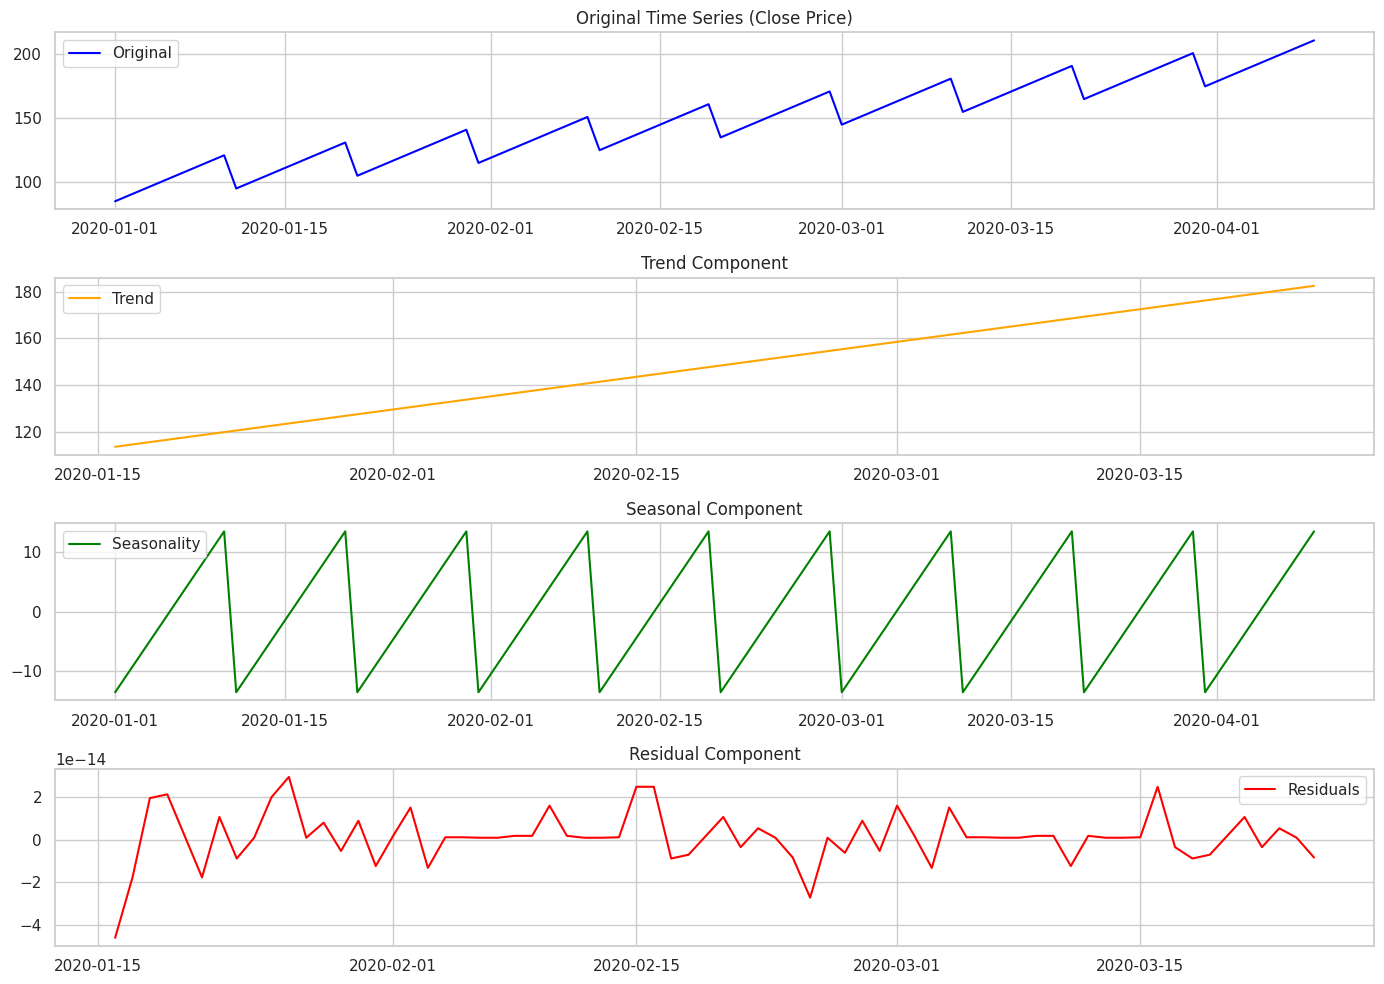

ADF Statistic: -0.0139
p-value: 0.9574
Critical Values:
	1%: -3.5069
	5%: -2.8950
	10%: -2.5846

Conclusion: The series is not stationary (fail to reject the null hypothesis).


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Assuming the dataset is named 'df' and the 'Date' column is properly formatted
# If not, here's a sample dataset for demonstration
data = {
    'Date': pd.date_range(start='2020-01-01', periods=100, freq='D'),
    'Close': [100 + i + (i % 10 - 5) * 3 for i in range(100)]  # Generating data for 'Close'
}
df = pd.DataFrame(data)

# Step 1: Convert the 'Date' column to datetime (if not already)
df['Date'] = pd.to_datetime(df['Date'])

# Step 2: Set the 'Date' column as the index for time series analysis
df.set_index('Date', inplace=True)

# Step 3: Time series decomposition using an additive model
# Decompose the 'Close' price into trend, seasonal, and residual components
decomposition = seasonal_decompose(df['Close'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Step 4: Plot the decomposition results
plt.figure(figsize=(14, 10))

# Original Time Series
plt.subplot(411)
plt.plot(df['Close'], label='Original', color='blue')
plt.title('Original Time Series (Close Price)')
plt.legend(loc='best')

# Trend
plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend(loc='best')

# Seasonality
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component')
plt.legend(loc='best')

# Residuals
plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.title('Residual Component')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Step 5: Stationarity check using Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(df['Close'].dropna())

# Print ADF Test Results
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"\t{key}: {value:.4f}")

# Step 6: Check the stationarity based on p-value
if adf_result[1] <= 0.05:
    print("\nConclusion: The series is stationary (reject the null hypothesis).")
else:
    print("\nConclusion: The series is not stationary (fail to reject the null hypothesis).")


ADF Statistic (Differenced): -2829821586150701.5000
p-value (Differenced): 0.0000
Critical Values (Differenced):
	1%: -3.5061
	5%: -2.8946
	10%: -2.5844


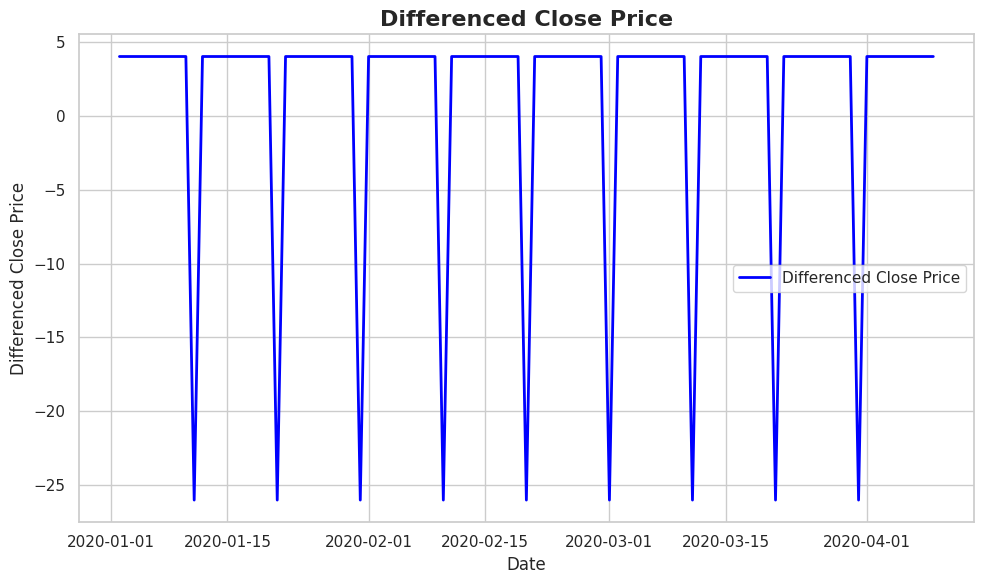


Conclusion: The differenced series is stationary (reject the null hypothesis).


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Step 1: Apply differencing to the Close price series
df['Close_diff'] = df['Close'].diff()  # First differencing

# Step 2: Recheck stationarity with the ADF test on the differenced series
# Drop any NaN values that result from differencing
adf_result_diff = adfuller(df['Close_diff'].dropna())

# Print ADF Test Results for the Differenced Series
print(f"ADF Statistic (Differenced): {adf_result_diff[0]:.4f}")
print(f"p-value (Differenced): {adf_result_diff[1]:.4f}")
print(f"Critical Values (Differenced):")
for key, value in adf_result_diff[4].items():
    print(f"\t{key}: {value:.4f}")

# Step 3: Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(df['Close_diff'], label='Differenced Close Price', color='blue', linewidth=2)
plt.title('Differenced Close Price', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Differenced Close Price', fontsize=12)
plt.legend(loc='best')
plt.grid(True)  # Adding grid for better readability
plt.tight_layout()
plt.show()

# Step 4: Conclusion about stationarity based on the ADF test for the differenced series
if adf_result_diff[1] <= 0.05:
    print("\nConclusion: The differenced series is stationary (reject the null hypothesis).")
else:
    print("\nConclusion: The differenced series is not stationary (fail to reject the null hypothesis).")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

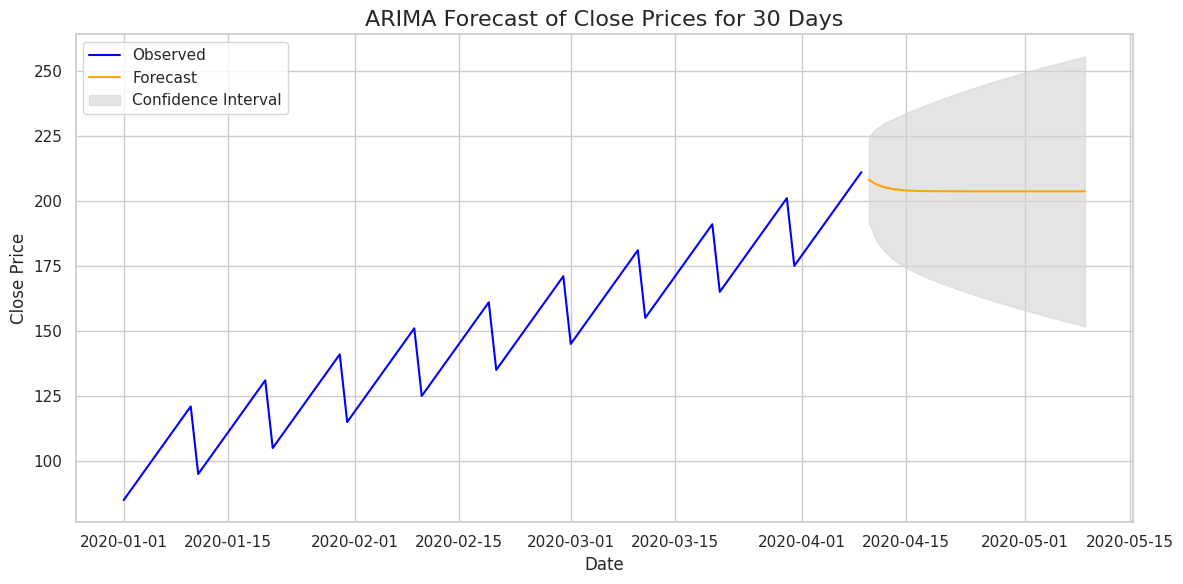

In [19]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Fit the ARIMA model
p, d, q = 1, 1, 1  # Adjust (p, d, q) as necessary based on ACF/PACF analysis
model = ARIMA(df['Close'], order=(p, d, q))
arima_result = model.fit()

# Step 2: Forecast future values
forecast_periods = 30  # Forecasting 30 periods into the future
forecast = arima_result.get_forecast(steps=forecast_periods)

# Get the predicted values and confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Step 3: Create a date range for the forecasted periods
last_date = df.index[-1]  # Last date in the original data
forecast_index = pd.date_range(start=last_date, periods=forecast_periods + 1, freq='D')[1:]  # Forecast index

# Step 4: Plot the actual data, forecasted data, and confidence intervals
plt.figure(figsize=(12, 6))

# Plot the original data
plt.plot(df.index, df['Close'], label='Observed', color='blue')

# Plot the forecasted data
plt.plot(forecast_index, forecast_values, label='Forecast', color='orange')

# Plot the confidence intervals
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightgrey', alpha=0.6, label='Confidence Interval')

# Customize the plot
plt.title(f'ARIMA Forecast of Close Prices for {forecast_periods} Days', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

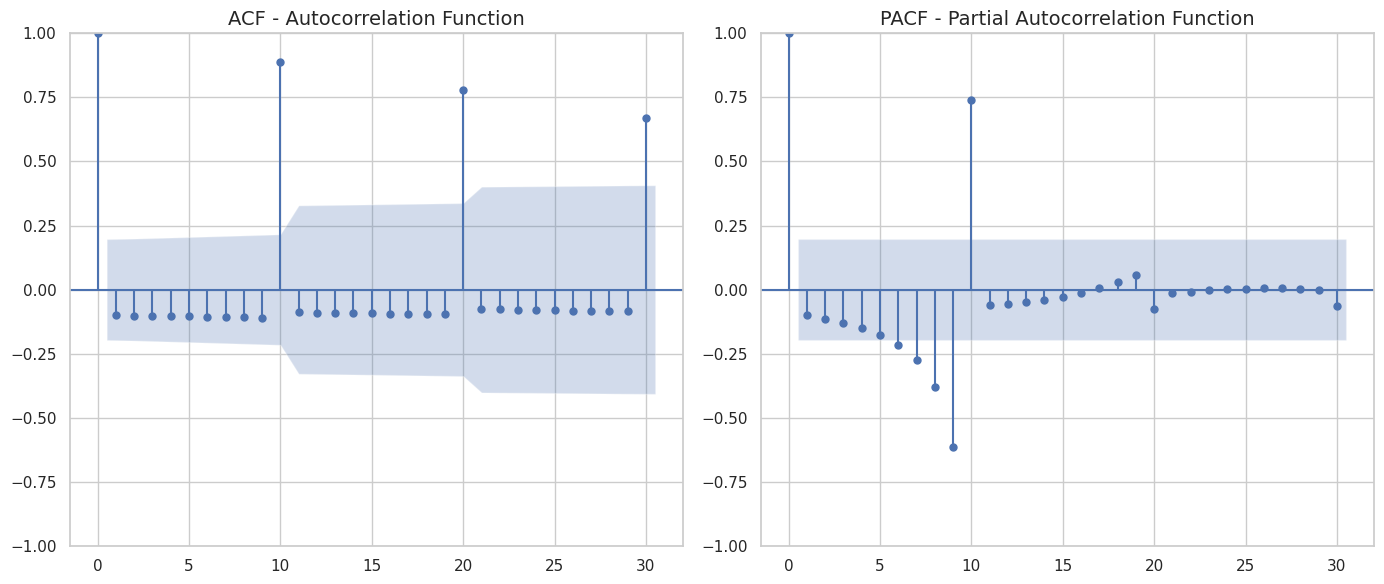

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -352.267
Date:                Sat, 07 Sep 2024   AIC                            710.534
Time:                        14:12:36   BIC                            718.320
Sample:                    01-01-2020   HQIC                           713.684
                         - 04-09-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6055      1.367      0.443      0.658      -2.074       3.285
ma.L1         -0.7954      1.049     -0.758      0.448      -2.852       1.261
sigma2        72.0355     31.121      2.315      0.0

<Figure size 1400x800 with 0 Axes>

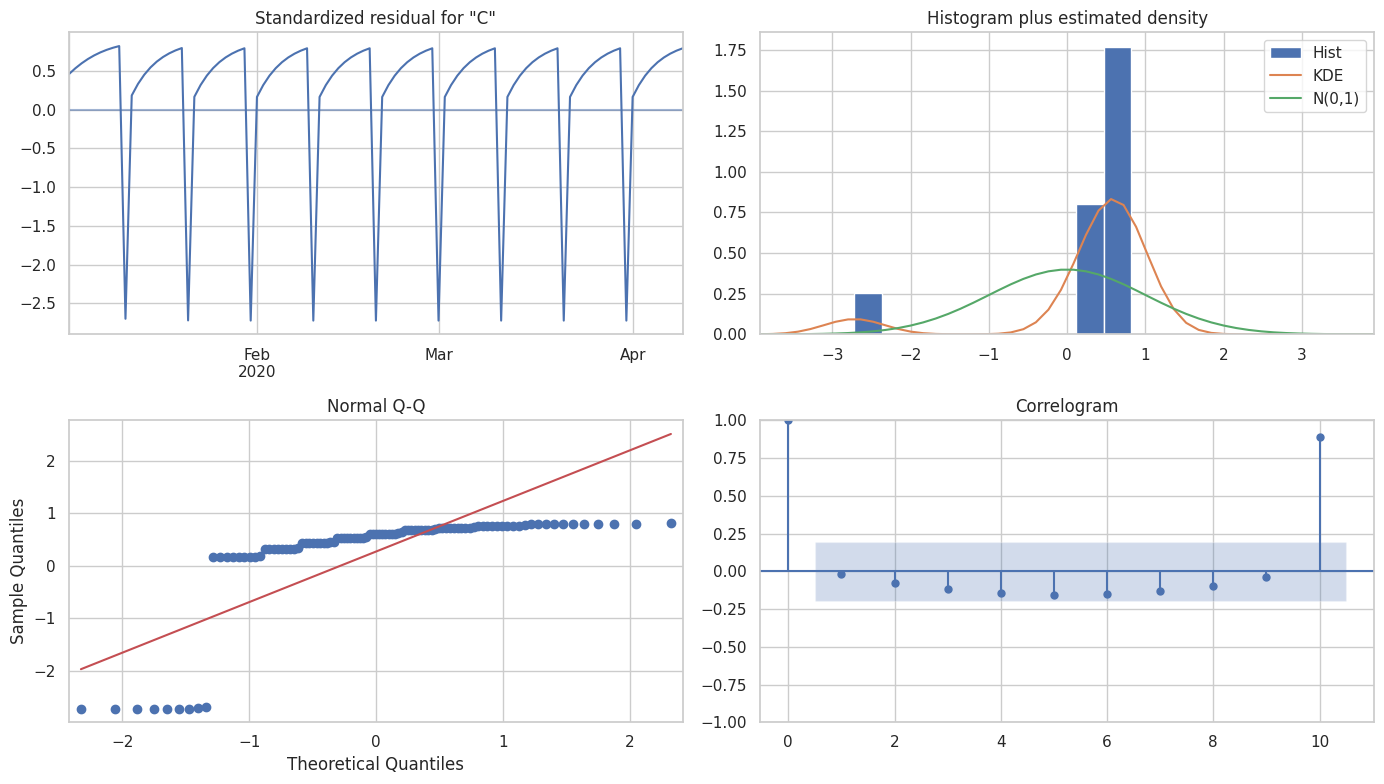

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Step 1: Plot ACF and PACF to determine p and q values for the ARIMA model
plt.figure(figsize=(14, 6))

# Autocorrelation function (ACF) to help determine q (Moving Average terms)
plt.subplot(121)
plot_acf(df['Close_diff'].dropna(), lags=30, ax=plt.gca())
plt.title('ACF - Autocorrelation Function', fontsize=14)

# Partial Autocorrelation function (PACF) to help determine p (Auto-Regressive terms)
plt.subplot(122)
plot_pacf(df['Close_diff'].dropna(), lags=30, ax=plt.gca())
plt.title('PACF - Partial Autocorrelation Function', fontsize=14)

plt.tight_layout()
plt.show()

# Step 2: Fit the ARIMA model
# (p, d, q) values determined from ACF and PACF; here, p=1, d=1 (since we differenced once), q=1 is just an example
# Feel free to adjust these values based on the ACF/PACF plots
p, d, q = 1, 1, 1
model = ARIMA(df['Close'], order=(p, d, q))

# Step 3: Fit the model and print the summary
arima_result = model.fit()

# Display the summary statistics of the ARIMA model
print(arima_result.summary())

# Step 4: Plot the model diagnostics
# Diagnostic plots include residual diagnostics to evaluate model fit
plt.figure(figsize=(14, 8))
arima_result.plot_diagnostics(figsize=(14, 8))
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3014: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse


                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                  100
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -1719.201
Date:                           Sat, 07 Sep 2024   AIC                           3448.403
Time:                                   14:12:45   BIC                           3460.497
Sample:                               01-01-2020   HQIC                          3453.262
                                    - 04-09-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan

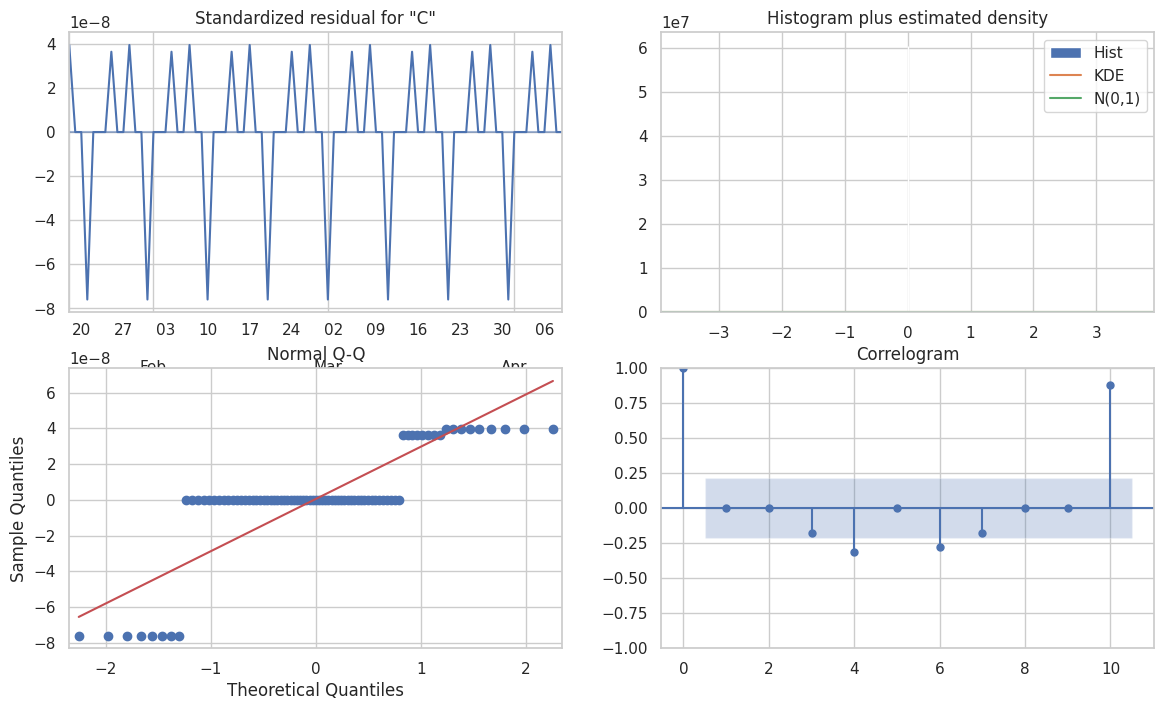

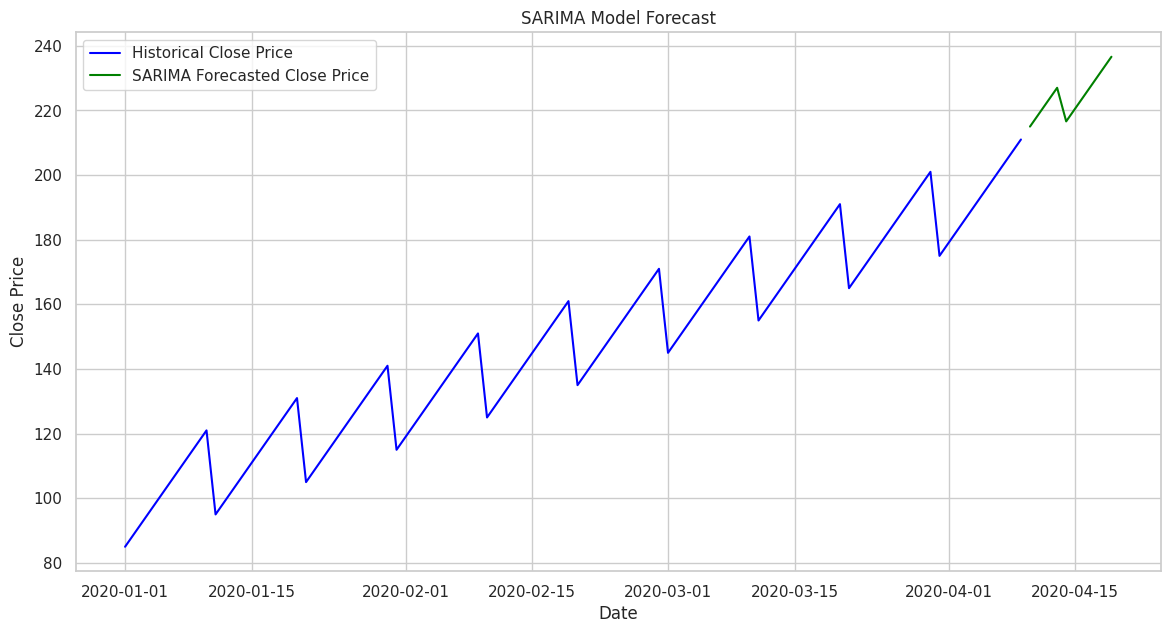

In [22]:
# Import the necessary module for SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define seasonal order (P, D, Q, s)
# s = 12 is typical for monthly seasonality, but since this is daily data, let's start with a weekly seasonality (s=7)
seasonal_order = (1, 1, 1, 7)

# Fit the SARIMA model
sarima_model = SARIMAX(df['Close'],
                       order=(1, 1, 1),
                       seasonal_order=seasonal_order,
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_result = sarima_model.fit()

# Print the model summary
print(sarima_result.summary())

# Plot the diagnostics to evaluate the model fit
sarima_result.plot_diagnostics(figsize=(14, 8))
plt.show()

# Generate forecasts using the SARIMA model
sarima_forecast = sarima_result.get_forecast(steps=10)
sarima_forecast_mean = sarima_forecast.predicted_mean

# Plot the forecast along with the historical data
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Historical Close Price', color='blue')
plt.plot(sarima_forecast_mean.index, sarima_forecast_mean, label='SARIMA Forecasted Close Price', color='green')
plt.title('SARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ly790bz/_e9uctkf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ly790bz/7ii4nf8j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7353', 'data', 'file=/tmp/tmp8ly790bz/_e9uctkf.json', 'init=/tmp/tmp8ly790bz/7ii4nf8j.json', 'output', 'file=/tmp/tmp8ly790bz/prophet_modelmtkl6rf8/prophet_model-20240907141309.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:13:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/p

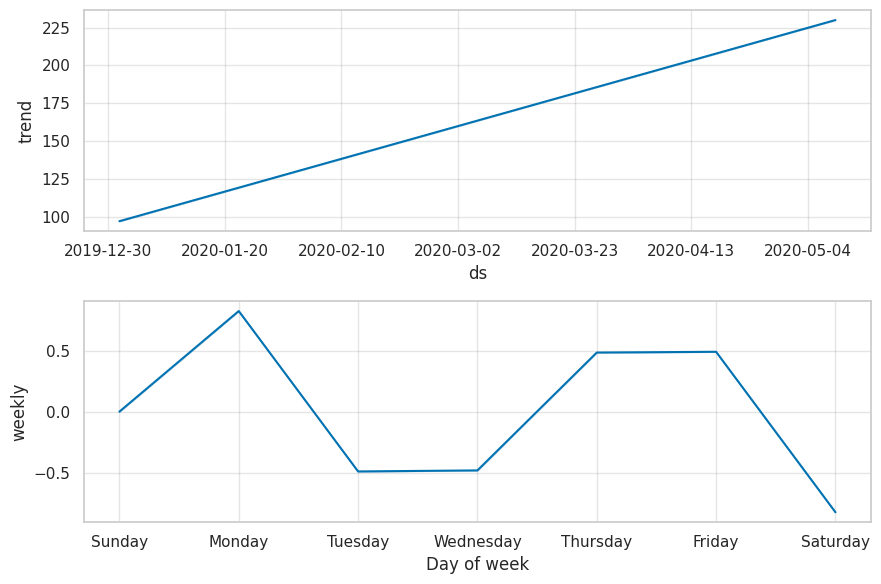

In [23]:
# Installing Prophet (if not already installed)
!pip install prophet

# Importing the necessary modules
from prophet import Prophet

# Prepare the data for Prophet (Prophet expects the columns to be named 'ds' and 'y')
df_prophet = df.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# Decompose the time series to evaluate seasonal trends
future = model.make_future_dataframe(periods=30)  # Create a dataframe for future predictions
forecast = model.predict(future)

# Plot the forecast components to analyze trend and seasonality
model.plot_components(forecast)
plt.show()


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 1400x700 with 0 Axes>

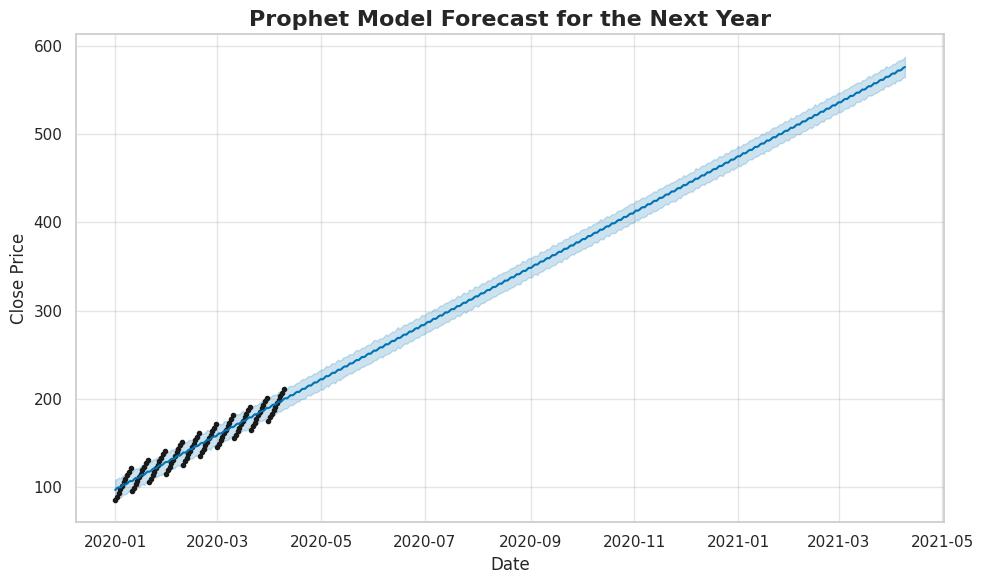

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


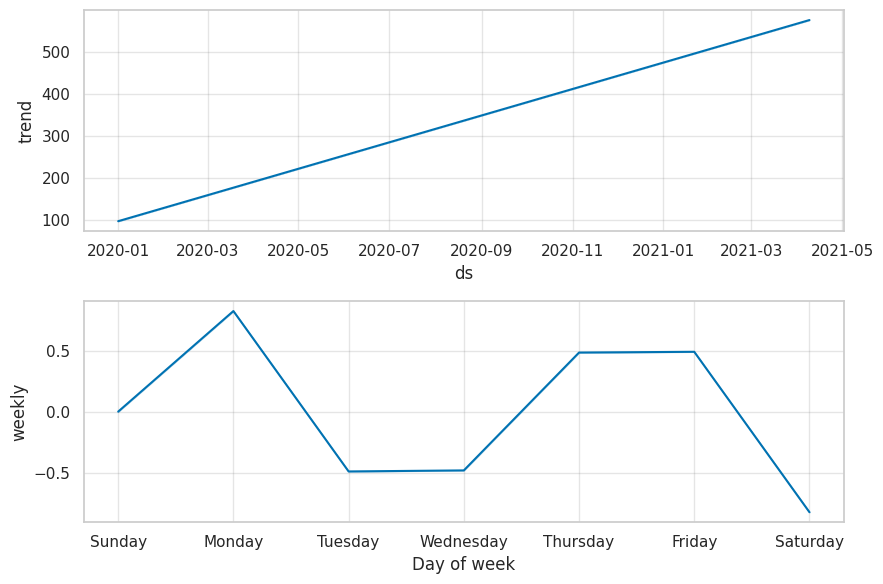

In [26]:
import matplotlib.pyplot as plt
from prophet import Prophet

# Step 1: Create a new future dataframe for the next 365 days
future_one_year = model.make_future_dataframe(periods=365)

# Step 2: Generate the forecast for the next year
forecast_one_year = model.predict(future_one_year)

# Step 3: Plot the forecasted values along with the historical data
plt.figure(figsize=(14, 7))

# Prophet's built-in plot function with forecast components
model.plot(forecast_one_year, xlabel='Date', ylabel='Close Price', uncertainty=True)

# Customize the plot for clarity and aesthetics
plt.title('Prophet Model Forecast for the Next Year', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)

# Add gridlines for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Optional: You can also plot forecast components (trend, seasonality)
model.plot_components(forecast_one_year)
plt.show()


## Modelling

In [27]:
from sklearn.impute import SimpleImputer


In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Correct import for SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Assume df is your dataframe and has already been loaded
# Define X (features) and y (target)
X = df.drop(columns=['Close'])
y = df['Close']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store models and their results
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

results = {}

# Define preprocessing steps: imputation followed by scaling
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Training and evaluating the models with preprocessing
for model_name, model in models.items():
    # Create a pipeline with preprocessing and the model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Predict on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[model_name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2
    }

# Convert the results dictionary to a DataFrame for better readability
results_df = pd.DataFrame(results).T
print(results_df)


                         MAE       RMSE        R²
Linear Regression  28.217434  32.696323 -0.203410
Ridge              28.198855  32.664234 -0.201049
Lasso              27.930665  32.266914 -0.172008
ElasticNet         27.620200  31.964759 -0.150161


In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import HuberRegressor, BayesianRidge, SGDRegressor
from sklearn.pipeline import Pipeline

# Adding additional models
models.update({
    'Polynomial Regression (degree=2)': Pipeline([
        ('preprocessor', preprocessor),
        ('poly', PolynomialFeatures(degree=2)),  # Add polynomial features
        ('model', LinearRegression())
    ]),
    'Huber Regression': HuberRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'SGD Regressor': SGDRegressor(max_iter=1000, tol=1e-3)
})

# Reinitializing the results dictionary
results = {}

# Training and evaluating all models with preprocessing
for model_name, model in models.items():
    if 'Polynomial' in model_name:
        # For Polynomial Regression, we already added preprocessing in the model definition
        pipeline = model
    else:
        # Create a pipeline with preprocessing and the model for other models
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Predict on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[model_name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2
    }

# Convert the results dictionary to a DataFrame for better readability
results_df = pd.DataFrame(results).T
print(results_df)

                                        MAE       RMSE        R²
Linear Regression                 28.217434  32.696323 -0.203410
Ridge                             28.198855  32.664234 -0.201049
Lasso                             27.930665  32.266914 -0.172008
ElasticNet                        27.620200  31.964759 -0.150161
Polynomial Regression (degree=2)  28.277456  32.817213 -0.212326
Huber Regression                  28.276815  32.749937 -0.207360
Bayesian Ridge                    27.582071  31.939568 -0.148349
SGD Regressor                     28.177904  32.663601 -0.201003


<ipython-input-37-d2fc5ddae6cf>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE', y='Model', data=results_df, palette='Blues_d', ax=axes[0])
<ipython-input-37-d2fc5ddae6cf>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=results_df, palette='Greens_d', ax=axes[1])
<ipython-input-37-d2fc5ddae6cf>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R²', y='Model', data=results_df, palette='Reds_d', ax=axes[2])


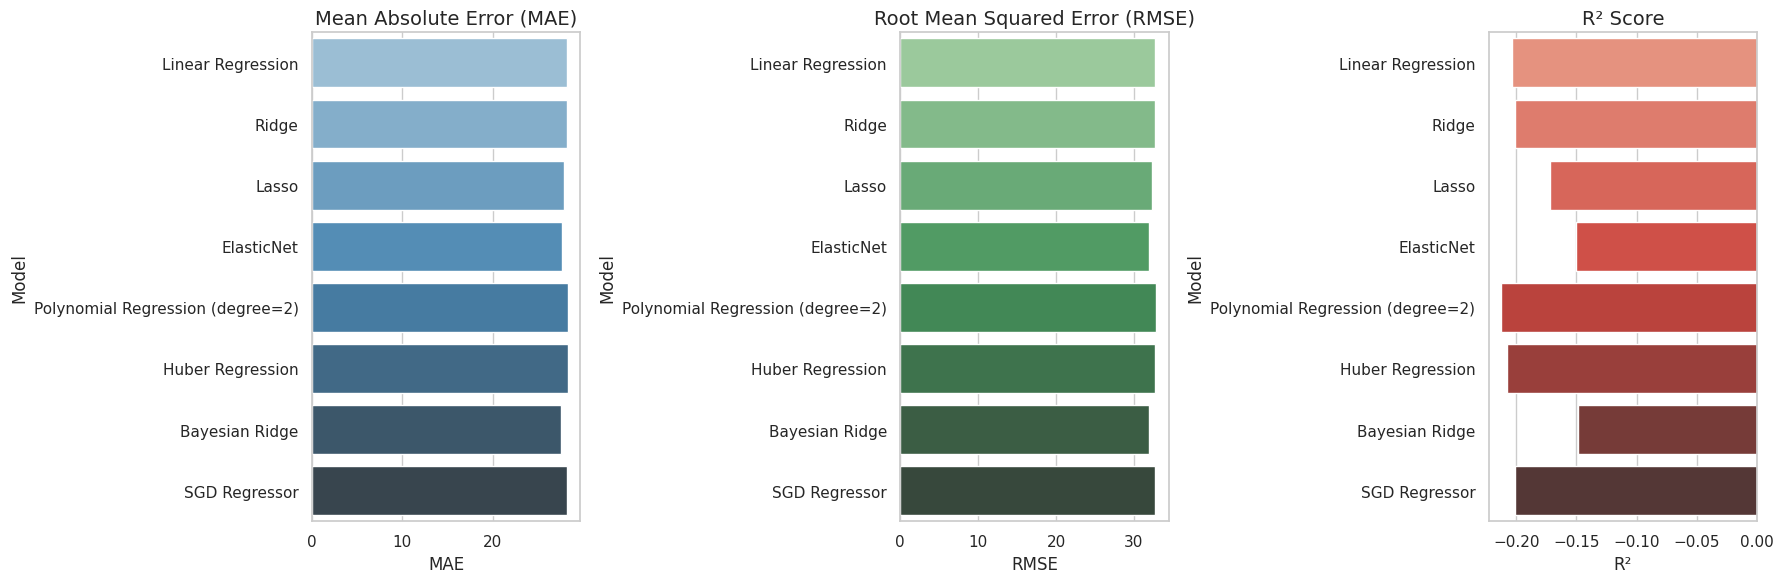

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data (as provided)
data = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'Polynomial Regression (degree=2)',
              'Huber Regression', 'Bayesian Ridge', 'SGD Regressor'],
    'MAE': [28.217434, 28.198855, 27.930665, 27.620200, 28.277456, 28.276815, 27.582071, 28.177904],
    'RMSE': [32.696323, 32.664234, 32.266914, 31.964759, 32.817213, 32.749937, 31.939568, 32.663601],
    'R²': [-0.203410, -0.201049, -0.172008, -0.150161, -0.212326, -0.207360, -0.148349, -0.201003]
}

# Convert to DataFrame
results_df = pd.DataFrame(data)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a 1x3 subplot for MAE, RMSE, and R²
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MAE Plot
sns.barplot(x='MAE', y='Model', data=results_df, palette='Blues_d', ax=axes[0])
axes[0].set_title('Mean Absolute Error (MAE)', fontsize=14)
axes[0].set_xlabel('MAE')

# RMSE Plot
sns.barplot(x='RMSE', y='Model', data=results_df, palette='Greens_d', ax=axes[1])
axes[1].set_title('Root Mean Squared Error (RMSE)', fontsize=14)
axes[1].set_xlabel('RMSE')

# R² Plot
sns.barplot(x='R²', y='Model', data=results_df, palette='Reds_d', ax=axes[2])
axes[2].set_title('R² Score', fontsize=14)
axes[2].set_xlabel('R²')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline

# Define parameter grids for models that require hyperparameter tuning
param_grid = {
    'Ridge': {
        'model__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
    },
    'Lasso': {
        'model__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
    },
    'ElasticNet': {
        'model__alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
        'model__l1_ratio': [0.2, 0.5, 0.8]
    },
    'Polynomial Regression (degree=2)': {
        'poly__degree': [2, 3]  # Adjust degree for polynomial regression
    },
    'SGD Regressor': {
        'model__alpha': [0.0001, 0.001, 0.01],
        'model__max_iter': [1000, 2000]
    }
}

# Reinitializing the results dictionary
results = {}

# Perform GridSearchCV for each model
for model_name, model in models.items():
    # Create a pipeline with preprocessing and the model
    if 'Polynomial' in model_name:
        pipeline = model  # Polynomial regression already has the pipeline
    else:
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])

    # Perform GridSearchCV if the model has a parameter grid
    if model_name in param_grid:
        grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_

        # Use the best model to predict on the test set
        y_pred = best_model.predict(X_test)
    else:
        # If no GridSearch is needed, just fit the pipeline directly
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[model_name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2
    }

# Convert the results dictionary to a DataFrame for better readability
results_df = pd.DataFrame(results).T
print(results_df)


                                        MAE       RMSE        R²
Linear Regression                 28.217434  32.696323 -0.203410
Ridge                             28.215555  32.693052 -0.203170
Lasso                             28.214567  32.691332 -0.203043
ElasticNet                        28.204921  32.674648 -0.201815
Polynomial Regression (degree=2)  28.277456  32.817213 -0.212326
Huber Regression                  28.276815  32.749937 -0.207360
Bayesian Ridge                    27.582071  31.939568 -0.148349
SGD Regressor                     28.236648  32.714583 -0.204755


<ipython-input-38-882920e019dc>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE', y='Model', data=results_df, palette='Blues_d', ax=axes[0])
<ipython-input-38-882920e019dc>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=results_df, palette='Greens_d', ax=axes[1])
<ipython-input-38-882920e019dc>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R²', y='Model', data=results_df, palette='Reds_d', ax=axes[2])


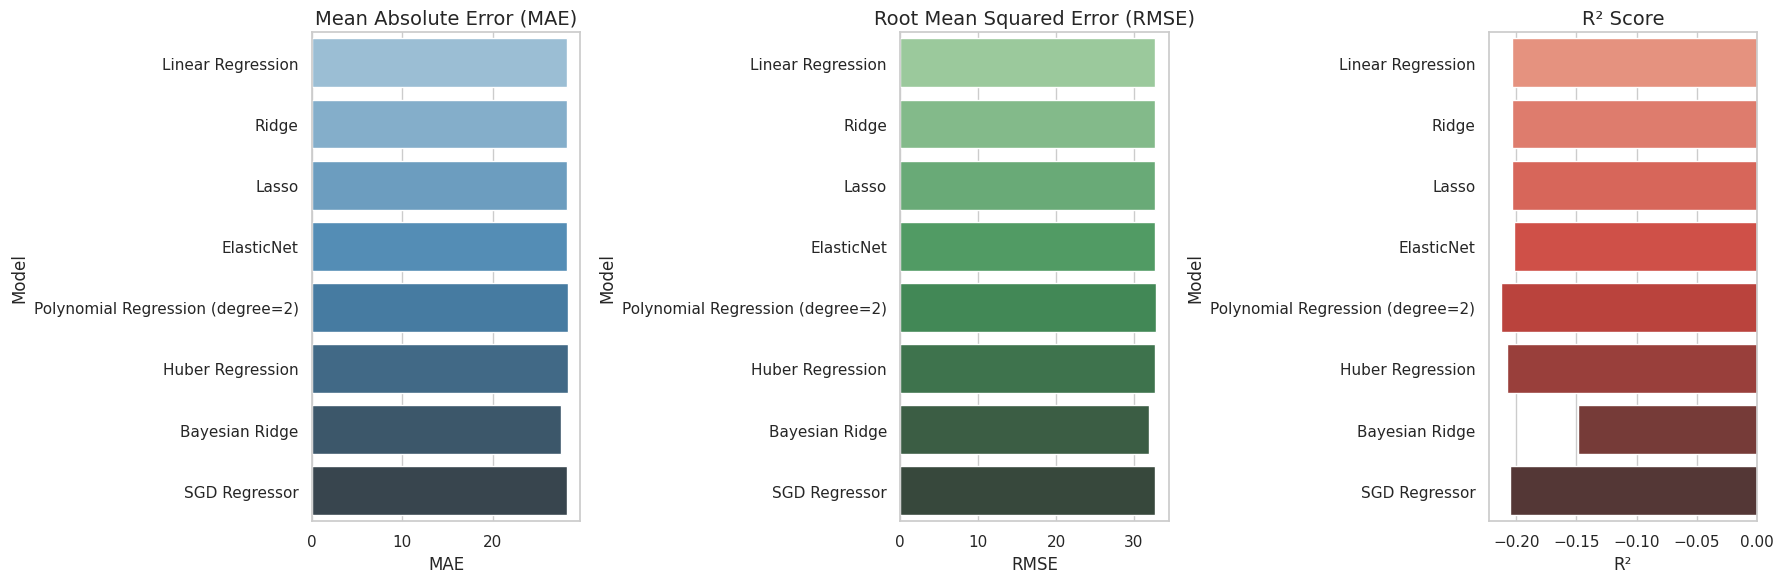

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Updated sample data (as provided)
data = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'Polynomial Regression (degree=2)',
              'Huber Regression', 'Bayesian Ridge', 'SGD Regressor'],
    'MAE': [28.217434, 28.215555, 28.214567, 28.204921, 28.277456, 28.276815, 27.582071, 28.236648],
    'RMSE': [32.696323, 32.693052, 32.691332, 32.674648, 32.817213, 32.749937, 31.939568, 32.714583],
    'R²': [-0.203410, -0.203170, -0.203043, -0.201815, -0.212326, -0.207360, -0.148349, -0.204755]
}

# Convert to DataFrame
results_df = pd.DataFrame(data)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a 1x3 subplot for MAE, RMSE, and R²
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MAE Plot
sns.barplot(x='MAE', y='Model', data=results_df, palette='Blues_d', ax=axes[0])
axes[0].set_title('Mean Absolute Error (MAE)', fontsize=14)
axes[0].set_xlabel('MAE')

# RMSE Plot
sns.barplot(x='RMSE', y='Model', data=results_df, palette='Greens_d', ax=axes[1])
axes[1].set_title('Root Mean Squared Error (RMSE)', fontsize=14)
axes[1].set_xlabel('RMSE')

# R² Plot
sns.barplot(x='R²', y='Model', data=results_df, palette='Reds_d', ax=axes[2])
axes[2].set_title('R² Score', fontsize=14)
axes[2].set_xlabel('R²')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [32]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.6 MB/s eta 0:00:00


In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# Define the tree-based and ensemble models
tree_based_models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'LightGBM': lgb.LGBMRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42),  # Silent output for CatBoost
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42),
    'Bagging Regressor': BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=42)
}

# Dictionary to store results
tree_results = {}

# Training and evaluating the tree-based models
for model_name, model in tree_based_models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Predict on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store the results
    tree_results[model_name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2
    }

# Convert the results dictionary to a DataFrame for better readability
tree_results_df = pd.DataFrame(tree_results).T
print(tree_results_df)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 0
[LightGBM] [Info] Start training from score 150.375000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the sp

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


<ipython-input-39-95d8e935d2e7>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE', y='Model', data=results_df, palette='Blues_d', ax=axes[0])
<ipython-input-39-95d8e935d2e7>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=results_df, palette='Greens_d', ax=axes[1])
<ipython-input-39-95d8e935d2e7>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R²', y='Model', data=results_df, palette='Reds_d', ax=axes[2])


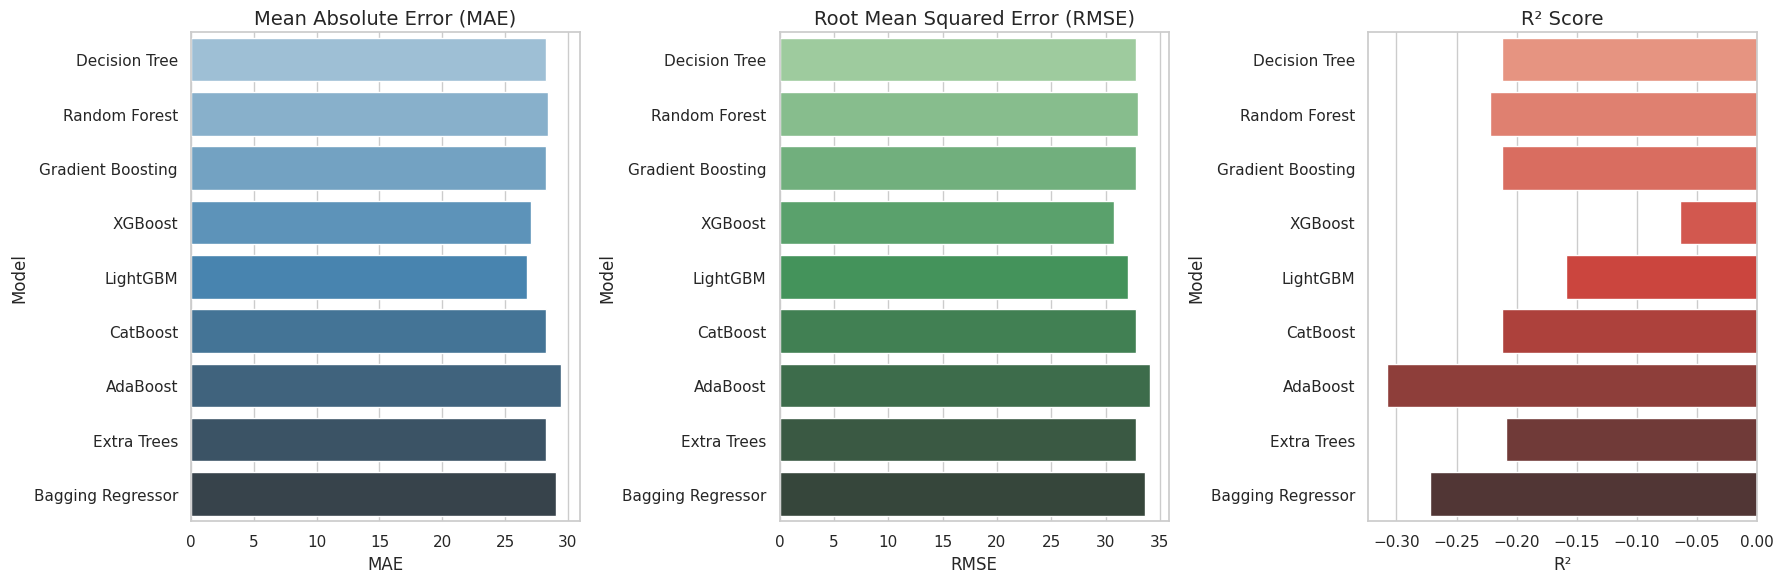

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Updated sample data (as provided)
data = {
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM',
              'CatBoost', 'AdaBoost', 'Extra Trees', 'Bagging Regressor'],
    'MAE': [28.277632, 28.447980, 28.277590, 27.073680, 26.775000, 28.277631, 29.491729, 28.253553, 29.050939],
    'RMSE': [32.817569, 32.948215, 32.817496, 30.751684, 32.083728, 32.817569, 34.087433, 32.768859, 33.616224],
    'R²': [-0.212352, -0.222024, -0.212347, -0.064520, -0.158739, -0.212352, -0.307990, -0.208756, -0.272078]
}

# Convert to DataFrame
results_df = pd.DataFrame(data)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a 1x3 subplot for MAE, RMSE, and R²
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MAE Plot
sns.barplot(x='MAE', y='Model', data=results_df, palette='Blues_d', ax=axes[0])
axes[0].set_title('Mean Absolute Error (MAE)', fontsize=14)
axes[0].set_xlabel('MAE')

# RMSE Plot
sns.barplot(x='RMSE', y='Model', data=results_df, palette='Greens_d', ax=axes[1])
axes[1].set_title('Root Mean Squared Error (RMSE)', fontsize=14)
axes[1].set_xlabel('RMSE')

# R² Plot
sns.barplot(x='R²', y='Model', data=results_df, palette='Reds_d', ax=axes[2])
axes[2].set_title('R² Score', fontsize=14)
axes[2].set_xlabel('R²')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Define the hyperparameter grid for each tree-based model
param_grid = {
    'Random Forest': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20, 30]
    },
    'Gradient Boosting': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 4, 5]
    },
    'XGBoost': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 4, 5]
    },
    'LightGBM': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [-1, 10, 20, 30]
    },
    'CatBoost': {
        'model__iterations': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__depth': [3, 4, 5]
    }
}

# Dictionary to store GridSearchCV results
tuned_tree_results = {}

# Perform GridSearchCV for each tree-based model
for model_name, model in tree_based_models.items():
    if model_name in param_grid:
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])

        # Set up GridSearchCV
        grid_search = GridSearchCV(
            pipeline,
            param_grid[model_name],
            cv=5,
            scoring='neg_mean_absolute_error',
            n_jobs=-1,  # Use all available cores for parallel processing
            verbose=1  # Prints progress during fitting
        )
        grid_search.fit(X_train, y_train)

        # Store the best parameters and the corresponding scores
        tuned_tree_results[model_name] = {
            'Best Parameters': grid_search.best_params_,
            'Best MAE': -grid_search.best_score_,  # Negate to get positive MAE
            'Best RMSE': np.sqrt(mean_squared_error(y_test, grid_search.predict(X_test))),
            'Best R²': r2_score(y_test, grid_search.predict(X_test))
        }

        # Optional: print the best parameters for each model
        print(f"{model_name} Best Parameters: {grid_search.best_params_}")
        print(f"{model_name} Best MAE: {-grid_search.best_score_}")

# Display the grid search results as a DataFrame
tuned_tree_results_df = pd.DataFrame(tuned_tree_results).T
print(tuned_tree_results_df)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Random Forest Best Parameters: {'model__max_depth': None, 'model__n_estimators': 50}
Random Forest Best MAE: 26.115789129737458
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Gradient Boosting Best Parameters: {'model__learning_rate': 0.2, 'model__max_depth': 3, 'model__n_estimators': 200}
Gradient Boosting Best MAE: 26.17131147540984
Fitting 5 folds for each of 27 candidates, totalling 135 fits
XGBoost Best Parameters: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 200}
XGBoost Best MAE: 26.169842529296876
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 80, number o

<ipython-input-40-b95015abadb6>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Best MAE', y='Model', data=results_df, palette='Blues_d', ax=axes[0])
<ipython-input-40-b95015abadb6>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Best RMSE', y='Model', data=results_df, palette='Greens_d', ax=axes[1])
<ipython-input-40-b95015abadb6>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Best R²', y='Model', data=results_df, palette='Reds_d', ax=axes[2])


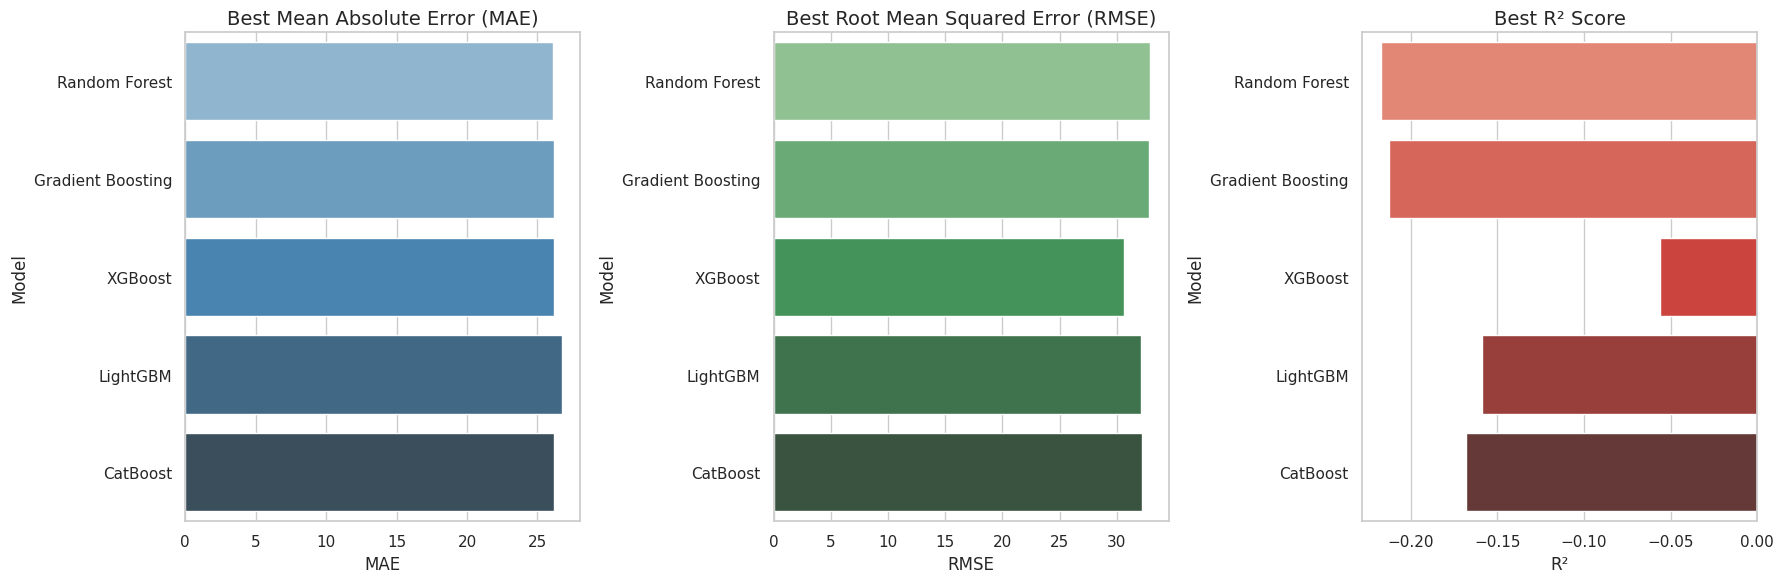

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data provided
data = {
    'Model': ['Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'CatBoost'],
    'Best MAE': [26.115789, 26.171311, 26.169843, 26.708594, 26.166649],
    'Best RMSE': [32.884896, 32.817569, 30.629700, 32.083728, 32.210531],
    'Best R²': [-0.217331, -0.212352, -0.056091, -0.158739, -0.167916]
}

# Convert to DataFrame
results_df = pd.DataFrame(data)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a 1x3 subplot for MAE, RMSE, and R²
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MAE Plot
sns.barplot(x='Best MAE', y='Model', data=results_df, palette='Blues_d', ax=axes[0])
axes[0].set_title('Best Mean Absolute Error (MAE)', fontsize=14)
axes[0].set_xlabel('MAE')

# RMSE Plot
sns.barplot(x='Best RMSE', y='Model', data=results_df, palette='Greens_d', ax=axes[1])
axes[1].set_title('Best Root Mean Squared Error (RMSE)', fontsize=14)
axes[1].set_xlabel('RMSE')

# R² Plot
sns.barplot(x='Best R²', y='Model', data=results_df, palette='Reds_d', ax=axes[2])
axes[2].set_title('Best R² Score', fontsize=14)
axes[2].set_xlabel('R²')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [35]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Define a basic neural network model
basic_nn_model = MLPRegressor(random_state=42, max_iter=1000)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', basic_nn_model)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
basic_nn_results = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'R²': r2_score(y_test, y_pred)
}

# Display the results
print("Basic Neural Network Results:")
print(basic_nn_results)


Basic Neural Network Results:
{'MAE': 39.941814538082475, 'RMSE': 49.052994171424245, 'R²': -1.7086128633779265}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
# Define the hyperparameter grid for the neural network
param_grid_nn = {
    'model__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'model__activation': ['relu', 'tanh'],
    'model__solver': ['adam', 'sgd'],
    'model__learning_rate': ['constant', 'adaptive'],
}

# Perform GridSearchCV to tune the hyperparameters
grid_search_nn = GridSearchCV(
    pipeline,
    param_grid_nn,
    cv=5,
    scoring='neg_mean_absolute_error'
)
grid_search_nn.fit(X_train, y_train)

# Predict on the test data with the best found model
y_pred_tuned = grid_search_nn.predict(X_test)

# Calculate evaluation metrics for the tuned model
tuned_nn_results = {
    'Best Parameters': grid_search_nn.best_params_,
    'MAE': mean_absolute_error(y_test, y_pred_tuned),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_tuned)),
    'R²': r2_score(y_test, y_pred_tuned)
}

# Display the results
print("Tuned Neural Network Results:")
print(tuned_nn_results)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

Tuned Neural Network Results:
{'Best Parameters': {'model__activation': 'relu', 'model__hidden_layer_sizes': (100, 50), 'model__learning_rate': 'constant', 'model__solver': 'adam'}, 'MAE': 27.693434607273208, 'RMSE': 31.660156193892636, 'R²': -0.1283452357985908}
